In [370]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the Credit.csv dataset
file_path = './data/Credit.csv'
credit_data = pd.read_csv(file_path)

# Display basic info and first few rows to understand the data
credit_data.info(), credit_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


(None,
    Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
 0           1   14.891   3606     283      2   34         11    Male      No   
 1           2  106.025   6645     483      3   82         15  Female     Yes   
 2           3  104.593   7075     514      4   71         11    Male      No   
 3           4  148.924   9504     681      3   36         11  Female      No   
 4           5   55.882   4897     357      2   68         16    Male      No   
 
   Married  Ethnicity  Balance  
 0     Yes  Caucasian      333  
 1     Yes      Asian      903  
 2      No      Asian      580  
 3      No      Asian      964  
 4     Yes  Caucasian      331  )

In [371]:
# Calculate mean and standard deviation of the Balance column
balance_mean = credit_data['Balance'].mean()
balance_std = credit_data['Balance'].std()

# Calculate Z-scores for Balance column
credit_data['Balance_Z'] = (credit_data['Balance'] - balance_mean) / balance_std

# Identify outliers: absolute value of z-score greater than 3
outliers = credit_data[np.abs(credit_data['Balance_Z']) > 3]
outliers_count = outliers.shape[0]
outliers_count

1

In [368]:
import pandas as pd

# Load the Credit.csv file
df = pd.read_csv('./data/Credit.csv')

# Display the first few rows to understand the structure of the data
df.head()

   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580  
3      No      Asian      964  
4     Yes  Caucasian      331  

In [369]:
# Calculating the Pearson correlation coefficient between 'Limit' and 'Balance'
correlation = df['Limit'].corr(df['Balance'])

# Round the result to two decimal places
correlation_rounded = round(correlation, 2)
correlation_rounded

np.float64(0.86)

In [366]:
import pandas as pd
from scipy.stats import shapiro

# Load the data
file_path = './data/Credit.csv'
data = pd.read_csv(file_path)

data['Age'].head()  # Show first few entries of Age column to understand the data

0    34
1    82
2    71
3    36
4    68
Name: Age, dtype: int64

In [367]:
# Perform the Shapiro-Wilk test for normality
stat, p_value = shapiro(data['Age'])

# Define significance level
alpha = 0.05

# Check if the distribution is normal or not
is_normal = "Normal" if p_value > alpha else "Not Normal"

is_normal

'Not Normal'

In [364]:
import pandas as pd

# Load the Credit.csv file
credit_data = pd.read_csv('./data/Credit.csv')

# Display the first few rows of the dataset to verify loading
credit_data.head()

   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580  
3      No      Asian      964  
4     Yes  Caucasian      331  

In [365]:
# Calculate the mean and standard deviation of the "Income" column
mean_income = round(credit_data['Income'].mean(), 2)
std_dev_income = round(credit_data['Income'].std(), 2)

mean_income, std_dev_income

(np.float64(45.22), np.float64(35.24))

In [361]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
df = pd.read_csv('./data/gapminder_cleaned.csv')
df.head()

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia

In [362]:
# Create the new feature
new_feature = df['pop'] * df['gdppercap']

# Min-max normalization
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

normalized_feature = min_max_scaling(new_feature)

# Save to dataframe
df['normalized_feature'] = normalized_feature

# Display statistics and first rows
print(df['normalized_feature'].describe())
df[['pop', 'gdppercap', 'normalized_feature']].head()

count    1704.000000
mean        0.014439
std         0.055204
min         0.000000
25%         0.000452
50%         0.001723
75%         0.008171
max         1.000000
Name: normalized_feature, dtype: float64


        pop   gdppercap  normalized_feature
0   8425333  779.445314            0.000504
1   9240934  820.853030            0.000582
2  10267083  853.100710            0.000673
3  11537966  836.197138            0.000742
4  13079460  739.981106            0.000744

In [363]:
# Perform Shapiro-Wilk test
stat, p_value = shapiro(df['normalized_feature'])

# Check if the normalized feature follows a normal distribution
is_normal = 'yes' if p_value > 0.05 else 'no'

print(f"Shapiro-Wilk test p-value: {p_value}")
print(f"Does the normalized feature follow a normal distribution? {is_normal}")

is_normal

Shapiro-Wilk test p-value: 6.0224960176690504e-64
Does the normalized feature follow a normal distribution? no


'no'

In [360]:
# Perform correlation analysis for each continent
from scipy.stats import pearsonr

results = {}

for cont in continents:
    subset = gapminder[gapminder['continent'] == cont]
    r, p = pearsonr(subset['lifeexp'], subset['gdppercap'])
    significance = 'significant' if p < 0.05 and abs(r) >= 0.5 else 'non-significant'
    results[cont] = (round(r, 2), round(p, 4), significance)

results

{'asia': (np.float64(0.38), np.float64(0.0), 'non-significant'),
 'europe': (np.float64(0.78), np.float64(0.0), 'significant'),
 'africa': (np.float64(0.43), np.float64(0.0), 'non-significant'),
 'americas': (np.float64(0.56), np.float64(0.0), 'significant'),
 'oceania': (np.float64(0.96), np.float64(0.0), 'significant')}

In [358]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('./data/gapminder_cleaned.csv')

df.head()

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia

In [359]:
# Create a new feature representing the GDP per capita in logarithmic scale (base 10)
# Assuming all GDP per capita values are positive as per the constraint

df['log10_gdppercap'] = np.log10(df['gdppercap'])

# Check for NaN values, calculate mean and std for the new feature
has_nan_values = df['log10_gdppercap'].isna().any()
new_feature_mean = round(df['log10_gdppercap'].mean(), 2)
new_feature_std = round(df['log10_gdppercap'].std(), 2)

has_nan_values, new_feature_mean, new_feature_std

(np.False_, np.float64(3.54), np.float64(0.54))

In [356]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('./data/gapminder_cleaned.csv')

# Display the first few rows to understand the structure of the dataset
df.head()

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia

In [357]:
# Rename columns to the case-sensitive correct names for clarity
# (As the question uses "Pop" and "Gdppercap" indicating case-sensitivity, we check the dataset for exact names first)
df.rename(columns={'pop':'Pop', 'gdppercap':'Gdppercap'}, inplace=True)

# Calculate Pearson correlation coefficient and p-value for Pop and Gdppercap
r_value, p_value = pearsonr(df['Pop'], df['Gdppercap'])

# Print results rounded to requested decimal places
r_value_rounded = round(r_value, 2)
p_value_rounded = round(p_value, 4)
r_value_rounded, p_value_rounded

(np.float64(-0.03), np.float64(0.2909))

In [354]:
import pandas as pd
from scipy.stats import normaltest

# Load the dataset
df = pd.read_csv('./data/gapminder_cleaned.csv')
# Display the first few rows and column names to understand the data structure
print(df.head())
print(df.columns)

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia
Index(['year', 'pop', 'lifeexp', 'gdppercap', 'country', 'continent'], dtype='object')


In [355]:
# Perform the normality test on the 'gdppercap' column
stat, p_value = normaltest(df['gdppercap'])

# Determine distribution type based on p-value
distribution_type = "normal" if p_value > 0.05 else "not normal"
distribution_type

'not normal'

In [349]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('./data/auto-mpg.csv')

# Display the first few rows to check the structure
df.head()

    mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

In [350]:
# Select features and target variable
X = df[['weight', 'acceleration']]
y = df['mpg']

# Split the dataset into training and testing sets with the ratio 8:2 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 2), (79, 2), (313,), (79,))

In [351]:
# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [352]:
# Predict on the testing set
y_pred = model.predict(X_test)

[No output generated]

In [353]:
# Calculate the mean squared error (MSE) on the testing set
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)

17.66

In [348]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./data/auto-mpg.csv')
df.head()

    mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

In [347]:
import pandas as pd

# Load the dataset
file_path = './data/auto-mpg.csv'
df = pd.read_csv(file_path)

# Display the first few rows and columns info to understand the structure and check for relevant columns
print(df.head())
print(df.columns)

    mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelyear', 'origin'],
      dtype='object')


In [346]:
import pandas as pd

# Load the dataset
file_path = './data/Current_Logan.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure and check the relevant columns
print(df.head())

  JAMES LOGAN           Unnamed: 1           Unnamed: 2        Unnamed: 3  \
0        Wins                 Name                 Code            School   
1           5     Gatlin & Ramarao  Archbishop Mitty GR  Archbishop Mitty   
2           5  Lahiri & Ponnuswamy  Archbishop Mitty LP  Archbishop Mitty   
3           4    Gupta & Chatradhi  Archbishop Mitty GC  Archbishop Mitty   
4           4     Patwa & Aggarwal  Archbishop Mitty PA  Archbishop Mitty   

   Unnamed: 4  Unnamed: 5          Unnamed: 6  Unnamed: 7 Unnamed: 8  
0         NaN         NaN  STANDARD TEAM NAME  NUM ROUNDS  WEIGHTING  
1         NaN         NaN            Mitty GR           5        0.8  
2         NaN         NaN            Mitty PL         NaN        NaN  
3         NaN         NaN          Mitty GuCh         NaN        NaN  
4         NaN         NaN            Mitty PA         NaN        NaN  


In [343]:
import pandas as pd
from scipy.stats import zscore

df = pd.read_csv('./data/ravenna_250715.csv')
df.head()

   Unnamed: 0   temp  humidity  pressure    description          dt  \
0           0  32.18        54      1010  moderate rain  1437730851   
1           1  32.37        62      1010  moderate rain  1437734494   
2           2  32.79        75      1009  moderate rain  1437738046   
3           3  32.75        79      1009  moderate rain  1437741580   
4           4  32.72        70      1008  moderate rain  1437745188   

   wind_speed  wind_deg     city                  day  dist  
0        2.11   330.003  Ravenna  2015-07-24 11:40:51     8  
1        2.60    20.000  Ravenna  2015-07-24 12:41:34     8  
2        3.60    70.000  Ravenna  2015-07-24 13:40:46     8  
3        5.10    70.000  Ravenna  2015-07-24 14:39:40     8  
4        3.10    10.000  Ravenna  2015-07-24 15:39:48     8  

In [344]:
# Calculate Z-scores for wind_speed
wind_speed_zscores = zscore(df['wind_speed'])

# Identify outliers based on Z-score threshold
outliers = df[(wind_speed_zscores > 3) | (wind_speed_zscores < -3)]
number_of_outliers = len(outliers)
outlier_values = outliers['wind_speed'].values

number_of_outliers, outlier_values

(0, array([], dtype=float64))

In [345]:
# Since there are no outliers by Z-score > 3 or < -3, the mean and std dev are calculated on original dataset
mean_wind_speed = round(df['wind_speed'].mean(), 2)
std_deviation_wind_speed = round(df['wind_speed'].std(), 2)

mean_wind_speed, std_deviation_wind_speed

(np.float64(2.29), np.float64(1.15))

In [342]:
# Split the data into training and testing sets (70% train, 30% test) and perform linear regression training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target
X = synth_df[['MedInc', 'AveRooms', 'Population', 'Latitude', 'Longitude']]
y = synth_df['MedianHouseValue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Present result rounded to three decimal places
mse_rounded = round(mse, 3)
mse_rounded

95779505.343

In [340]:
import pandas as pd
import numpy as np
from statistics import mean, stdev

# Load the dataset
file_path = './data/my_test_01.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.9298      36.0  3.676162   1.100450      2664.0  3.994003     33.93   
1  2.7006      17.0  4.499388   1.039780      3331.0  2.038556     32.79   
2  5.0286      30.0  6.184375   1.068750       999.0  3.121875     34.89   
3  3.9038      21.0  3.586357   0.982583      1486.0  2.156749     37.36   
4  7.1754      52.0  7.429487   1.051282       779.0  2.496795     37.90   

   Longitude  MedianHouseValue  
0    -118.25             1.000  
1    -117.03             1.663  
2    -120.43             1.580  
3    -122.02             2.438  
4    -122.28             3.629  


In [341]:
# Calculate mean and standard deviation of the MedianHouseValue column
median_house_value_list = df['MedianHouseValue'].tolist()

mean_value = mean(median_house_value_list)
std_dev = stdev(median_house_value_list)

# Round to four decimal places
mean_value_rounded = round(mean_value, 4)
std_dev_rounded = round(std_dev, 4)

mean_value_rounded, std_dev_rounded

(2.1226, 1.221)

In [339]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/YAHOO-BTC_USD_D.csv')
# Display the first few rows and info to understand data structure
(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2176 non-null   object 
 1   Open       2175 non-null   float64
 2   High       2175 non-null   float64
 3   Low        2175 non-null   float64
 4   Close      2175 non-null   float64
 5   Adj Close  2175 non-null   float64
 6   Volume     2175 non-null   float64
dtypes: float64(6), object(1)
memory usage: 119.1+ KB


(         Date        Open        High         Low       Close   Adj Close  \
 0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
 1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
 2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
 3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
 4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   
 
        Volume  
 0  21056800.0  
 1  34483200.0  
 2  37919700.0  
 3  36863600.0  
 4  26580100.0  ,
 None)

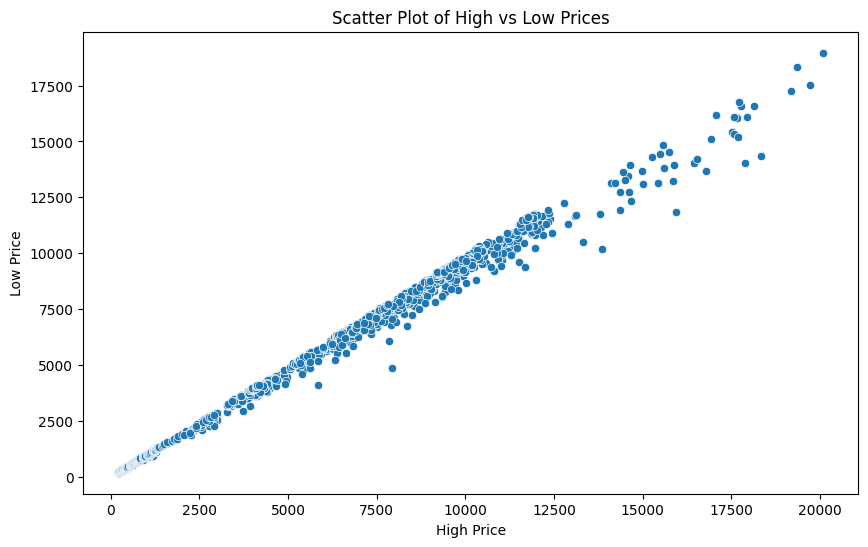

In [338]:
# Create a scatter plot to visualize the relationship between 'High' and 'Low' prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='High', y='Low', data=df_clean)
plt.title('Scatter Plot of High vs Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()

In [337]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset
file_path = './data/DES=+2006261.csv'
df = pd.read_csv(file_path)

# Display the first few rows and columns for quick inspection
print(df.head())

# Check for the existence of the X-coordinate column
print(df.columns)

          JDTDB              Calendar Date (TDB)             X             Y  \
0  2.451215e+06   A.D. 1999-Feb-05 00:58:29.0000 -2.887479e+08  2.475795e+07   
1  2.451216e+06   A.D. 1999-Feb-06 00:58:29.0000 -2.894466e+08  2.303593e+07   
2  2.451217e+06   A.D. 1999-Feb-07 00:58:29.0000 -2.901336e+08  2.131300e+07   
3  2.451218e+06   A.D. 1999-Feb-08 00:58:29.0000 -2.908092e+08  1.958922e+07   
4  2.451219e+06   A.D. 1999-Feb-09 00:58:29.0000 -2.914731e+08  1.786466e+07   

              Z  Unnamed: 5  
0  2.212686e+07         NaN  
1  2.286679e+07         NaN  
2  2.360580e+07         NaN  
3  2.434388e+07         NaN  
4  2.508099e+07         NaN  
Index(['JDTDB', 'Calendar Date (TDB)', 'X', 'Y', 'Z', 'Unnamed: 5'], dtype='object')


In [336]:
import pandas as pd

# Load the dataset
file_path = './data/DES=+2006261.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure and check the relevant columns
print(df.head())

          JDTDB              Calendar Date (TDB)             X             Y  \
0  2.451215e+06   A.D. 1999-Feb-05 00:58:29.0000 -2.887479e+08  2.475795e+07   
1  2.451216e+06   A.D. 1999-Feb-06 00:58:29.0000 -2.894466e+08  2.303593e+07   
2  2.451217e+06   A.D. 1999-Feb-07 00:58:29.0000 -2.901336e+08  2.131300e+07   
3  2.451218e+06   A.D. 1999-Feb-08 00:58:29.0000 -2.908092e+08  1.958922e+07   
4  2.451219e+06   A.D. 1999-Feb-09 00:58:29.0000 -2.914731e+08  1.786466e+07   

              Z  Unnamed: 5  
0  2.212686e+07         NaN  
1  2.286679e+07         NaN  
2  2.360580e+07         NaN  
3  2.434388e+07         NaN  
4  2.508099e+07         NaN  


In [334]:
import csv
import math

# Path to the data file
data_file = './data/DES=+2006261.csv'

# Variables to store values of X-coordinate
x_coords = []

# Read the CSV file and extract X-coordinate data
with open(data_file, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if 'X-coordinate' in row and row['X-coordinate']:
            x_coords.append(float(row['X-coordinate']))

# Calculate mean
mean_x = sum(x_coords) / len(x_coords)

# Calculate standard deviation
variance = sum((x - mean_x) ** 2 for x in x_coords) / len(x_coords)
std_dev_x = math.sqrt(variance)

# Round to three decimal places
mean_x_rounded = round(mean_x, 3)
std_dev_x_rounded = round(std_dev_x, 3)

(mean_x_rounded, std_dev_x_rounded)

---------------------------------------------------------------------------
ZeroDivisionError                         Traceback (most recent call last)
Cell In[413], line 18
     15             x_coords.append(float(row['X-coordinate']))
     17 # Calculate mean
---> 18 mean_x = sum(x_coords) / len(x_coords)
     20 # Calculate standard deviation
     21 variance = sum((x - mean_x) ** 2 for x in x_coords) / len(x_coords)

ZeroDivisionError: division by zero

In [335]:
# Adjust the code to use the correct column name 'X' for X-coordinate
x_coords = []

with open(data_file, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if 'X' in row and row['X']:
            x_coords.append(float(row['X']))

mean_x = sum(x_coords) / len(x_coords)
variance = sum((x - mean_x) ** 2 for x in x_coords) / len(x_coords)
std_dev_x = math.sqrt(variance)

mean_x_rounded = round(mean_x, 3)
std_dev_x_rounded = round(std_dev_x, 3)

(mean_x_rounded, std_dev_x_rounded)

(-259162995.016, 53447767.921)

In [333]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load the dataset
file_path = './data/traj-Osak.csv'
df = pd.read_csv(file_path)

# Check first few rows and the column for trajectory duration
print(df.head())
print(df.columns)

# Extract the trajectory duration column (assuming 'poiDuration' represents duration)
durations = df['poiDuration']

# Calculate Z-scores for the duration
z_scores = zscore(durations)

# Define threshold for outlier detection
threshold = 2.5

# Identify outliers
outliers = (z_scores < -threshold) | (z_scores > threshold)

# Filter out outliers
filtered_durations = durations[~outliers]

# Calculate new mean and std dev after removing outliers
mean_new = np.round(np.mean(filtered_durations), 2)
std_dev_new = np.round(np.std(filtered_durations, ddof=0), 2)

mean_new, std_dev_new

         userID  trajID  poiID   startTime     endTime  #photo  trajLen  \
0  10297518@N00       1     20  1277719324  1277720832       6        1   
1  10307040@N08       2      6  1382608644  1382608644       1        4   
2  10307040@N08       2      8  1382607812  1382607812       1        4   
3  10307040@N08       2     21  1382607761  1382607774       2        4   
4  10307040@N08       2     22  1382607879  1382608628       9        4   

   poiDuration  
0         1508  
1            0  
2            0  
3           13  
4          749  
Index(['userID', 'trajID', 'poiID', 'startTime', 'endTime', '#photo',
       'trajLen', 'poiDuration'],
      dtype='object')


(np.float64(1253.61), np.float64(2513.69))

In [331]:
import pandas as pd

# Load the abalone data
abalone_df = pd.read_csv('./data/abalone.csv')

# Display the first few rows to understand the structure
abalone_df.head()

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

In [329]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('./data/titanic_test.csv')

df.head()

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

In [330]:
# Calculate Pearson correlation coefficient (r) and p-value between SibSp and Parch
r, p_value = pearsonr(df['SibSp'], df['Parch'])

# Determine the relationship type based on constraints
if p_value < 0.05:
    if abs(r) >= 0.5:
        relationship_type = 'linear'
    else:
        relationship_type = 'nonlinear'
else:
    relationship_type = 'none'

# Format the results
result = f"@correlation_coefficient[{r:.2f}], @p_value[{p_value:.4f}], @relationship_type[{relationship_type}]"
result

'@correlation_coefficient[0.31], @p_value[0.0000], @relationship_type[nonlinear]'

In [326]:
# Load the dataset and show first few rows to verify the structure
import pandas as pd

file_path = './data/titanic.csv'
df = pd.read_csv(file_path)
df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

In [327]:
# Extract the title from the 'Name' column as per the given constraints
import re

def extract_title(name):
    match = re.search(r',\s*([^\s]+)\.', name)
    if match:
        title = match.group(1)
        if title in ['Mr', 'Mrs', 'Miss']:
            return title
    return 'Other'

# Create the 'Title' column
df['Title'] = df['Name'].apply(extract_title)

# Check the distribution of the new 'Title' feature
distribution = df['Title'].value_counts()
distribution

Title
Mr       517
Miss     182
Mrs      125
Other     67
Name: count, dtype: int64

In [328]:
# Analyze if 'Title' is correlated with 'Pclass' using a chi-square test
from scipy.stats import chi2_contingency

# Create a contingency table
table = pd.crosstab(df['Title'], df['Pclass'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Output the results rounded as per instructions
chi2_rounded = round(chi2, 2)
p_rounded = round(p, 4)

(chi2_rounded, p_rounded)

(np.float64(38.29), np.float64(0.0))

In [324]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Load the dataset
file_path = './data/hotel_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()

   hotel_id                    hotel_name      city_name  star_rating  \
0     75737        Night Theater District  New York City          4.0   
1     93401  Heritage Hotel New York City  New York City          2.5   
2    224217     Clarion Hotel Park Avenue  New York City          2.5   
3    488793             Solita Soho Hotel  New York City          3.0   
4   1028569               Greenwich Hotel  New York City          5.0   

   bubble_score  review_count hotel_type                       brand_name  \
0          40.0          2291      Hotel                      Night Hotel   
1          35.0           968      Hotel                              NaN   
2          35.0           462      Hotel                          Clarion   
3          40.0           520      Hotel                Ascend Collection   
4          45.0           582      Hotel  The Leading Hotels of the World   

                      parent_brand_name  
0                   Wyndham Hotel Group  
1             

In [323]:
import pandas as pd

# Load the hotel_data.csv dataset
file_path = './data/hotel_data.csv'
hotel_data = pd.read_csv(file_path)

# Display the first few rows and columns info to understand the structure
hotel_data.head(), hotel_data.columns

(   hotel_id                    hotel_name      city_name  star_rating  \
 0     75737        Night Theater District  New York City          4.0   
 1     93401  Heritage Hotel New York City  New York City          2.5   
 2    224217     Clarion Hotel Park Avenue  New York City          2.5   
 3    488793             Solita Soho Hotel  New York City          3.0   
 4   1028569               Greenwich Hotel  New York City          5.0   
 
    bubble_score  review_count hotel_type                       brand_name  \
 0          40.0          2291      Hotel                      Night Hotel   
 1          35.0           968      Hotel                              NaN   
 2          35.0           462      Hotel                          Clarion   
 3          40.0           520      Hotel                Ascend Collection   
 4          45.0           582      Hotel  The Leading Hotels of the World   
 
                       parent_brand_name  
 0                   Wyndham Hotel Group 

In [322]:
import pandas as pd

# Load the dataset
file_path = './data/hotel_data.csv'
df = pd.read_csv(file_path)

df.head()

   hotel_id                    hotel_name      city_name  star_rating  \
0     75737        Night Theater District  New York City          4.0   
1     93401  Heritage Hotel New York City  New York City          2.5   
2    224217     Clarion Hotel Park Avenue  New York City          2.5   
3    488793             Solita Soho Hotel  New York City          3.0   
4   1028569               Greenwich Hotel  New York City          5.0   

   bubble_score  review_count hotel_type                       brand_name  \
0          40.0          2291      Hotel                      Night Hotel   
1          35.0           968      Hotel                              NaN   
2          35.0           462      Hotel                          Clarion   
3          40.0           520      Hotel                Ascend Collection   
4          45.0           582      Hotel  The Leading Hotels of the World   

                      parent_brand_name  
0                   Wyndham Hotel Group  
1             

In [320]:
import pandas as pd
from scipy.stats import pearsonr

# Load dataset
file_path = './data/cost_data_with_errors.csv'
df = pd.read_csv(file_path)

df.head()

   Unnamed: 0    name   dates_active  max_storm_cat  max_sust_wind   min_p  \
0           0  ARLENE  April 19 – 21              1       43.44880   990.0   
1           1    BRET   June 19 – 20              1       43.44880  1007.0   
2           2   CINDY   June 20 – 23              1       52.13856   991.0   
3           3    FOUR     July 5 – 7              0       26.06928  1009.0   
4           4     DON   July 17 – 18              1       43.44880  1005.0   

                                      areas_affected  damage_USD  deaths  \
0                                                NaN         0.0     0.0   
1  Guyana, Venezuela, Trinidad and Tobago, Windwa...   3000000.0     2.0   
2  Honduras, Belize, Cayman Islands, Yucatán Peni...  25000000.0     2.0   
3                                                NaN         0.0     0.0   
4    Windward Islands, Barbados, Trinidad and Tobago         0.0     0.0   

   year  damage_imputed  
0  2017               0  
1  2017               

In [318]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = './data/bitconnect_price.csv'
df = pd.read_csv(file_path)
df.head()

           Date    Open    High     Low   Close     Volume   Market Cap
0  Sep 17, 2017  109.75  110.94  102.81  106.84  5,350,380  737,226,000
1  Sep 16, 2017  111.11  116.01  105.02  109.85  5,683,580  744,652,000
2  Sep 15, 2017   97.42  113.75   89.36  111.22  8,539,660  652,107,000
3  Sep 14, 2017  115.97  117.38   96.71   96.71  6,367,800  775,543,000
4  Sep 13, 2017  123.14  123.70  112.60  115.97  6,315,510  822,282,000

In [319]:
# Train Random Forest Classifier with default parameters
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Get feature importances (Gini importance)
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

accuracy, importance_df

(1.0,
   Feature  Importance
 0    Open         0.0
 1    High         0.0
 2     Low         0.0)

In [315]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the data
file_path = './data/bitconnect_price.csv'
data = pd.read_csv(file_path)

data.head()

           Date    Open    High     Low   Close     Volume   Market Cap
0  Sep 17, 2017  109.75  110.94  102.81  106.84  5,350,380  737,226,000
1  Sep 16, 2017  111.11  116.01  105.02  109.85  5,683,580  744,652,000
2  Sep 15, 2017   97.42  113.75   89.36  111.22  8,539,660  652,107,000
3  Sep 14, 2017  115.97  117.38   96.71   96.71  6,367,800  775,543,000
4  Sep 13, 2017  123.14  123.70  112.60  115.97  6,315,510  822,282,000

In [316]:
# Convert the 'Date' column to datetime format
# The date format looks like: 'Sep 17, 2017'
data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y')

# Extract weekday name
# Monday=0, ..., Sunday=6
# Weekday (Monday to Friday) vs Weekend (Saturday and Sunday)
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Mark as weekday or weekend
# weekday 0-4, weekend 5-6
s = data['DayOfWeek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
data['DayType'] = s

# Convert 'Open' column to numeric, forcing errors to NaN and drop those rows
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data = data.dropna(subset=['Open'])

# Calculate mean opening prices
weekday_mean = data.loc[data['DayType'] == 'Weekday', 'Open'].mean()
weekend_mean = data.loc[data['DayType'] == 'Weekend', 'Open'].mean()

weekday_mean, weekend_mean

(np.float64(37.296604953216374), np.float64(38.48679881428571))

In [317]:
# Extract the opening price values for weekdays and weekends
o_weekday = data.loc[data['DayType'] == 'Weekday', 'Open']
o_weekend = data.loc[data['DayType'] == 'Weekend', 'Open']

# Conduct two-sample t-test
# Null hypothesis: The means of weekday and weekend opening prices are equal
# Alternative hypothesis: The means are different
t_stat, p_value = ttest_ind(o_weekday, o_weekend, equal_var=False)  # Welch's t-test

p_value

np.float64(0.8462824189035127)

In [313]:
# Load the Titanic data and display first few rows to understand the structure
import pandas as pd

df = pd.read_csv('./data/titanic_train.csv')
df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

In [314]:
# Calculate the average age of passengers in each Pclass, ignoring rows with missing age
average_ages = df[df['Age'].notna()].groupby('Pclass')['Age'].mean().round(2)
average_ages

Pclass
1    38.23
2    29.88
3    25.14
Name: Age, dtype: float64

In [312]:
import pandas as pd
from scipy.stats import pearsonr

# Load the Titanic dataset
file_path = './data/titanic_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [311]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = './data/titanic_train.csv'
df = pd.read_csv(file_path)

df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

In [308]:
import pandas as pd
from scipy.stats import shapiro, skew, kurtosis

# Load the dataset
file_path = './data/2014_q4.csv'
df = pd.read_csv(file_path)

# Display the columns and first few rows to identify the target column
print(df.columns)
df.head()

Index(['Date', 'Trips over the past 24-hours (midnight to 11:59pm)',
       'Cumulative trips (since launch):',
       'Miles traveled today (midnight to 11:59 pm)',
       'Miles traveled to date:', 'Total Annual Memberships Sold',
       'Annual Member Sign-Ups (midnight to 11:59 pm)',
       '24-Hour Passes Purchased (midnight to 11:59 pm)',
       '7-Day Passes Purchased (midnight to 11:59 pm)'],
      dtype='object')


        Date  Trips over the past 24-hours (midnight to 11:59pm)  \
0  10/1/2014                                              31197    
1  10/2/2014                                              38286    
2  10/3/2014                                              38956    
3  10/4/2014                                              15088    
4  10/5/2014                                              26247    

   Cumulative trips (since launch):  \
0                          13296973   
1                          13335259   
2                          13374215   
3                          13389303   
4                          13415550   

   Miles traveled today (midnight to 11:59 pm)  Miles traveled to date:  \
0                                        44612                 23121175   
1                                        60639                 23181814   
2                                        65739                 23247553   
3                                        24254          

In [309]:
# Extract the relevant column for analysis
trips = df['Trips over the past 24-hours (midnight to 11:59pm)'].astype(int)

# Perform Shapiro-Wilk test for normality
shapiro_test_stat, shapiro_p_value = shapiro(trips)

# Calculate skewness and kurtosis
trip_skewness = skew(trips)
trip_kurtosis = kurtosis(trips)

(shapiro_test_stat, shapiro_p_value, trip_skewness, trip_kurtosis)

(np.float64(0.9543095491220899),
 np.float64(0.0027291466836339875),
 np.float64(0.1520317726967334),
 np.float64(-1.1336054960924962))

In [306]:
import pandas as pd
from scipy.stats import zscore

# Load the weather dataset
weather_df = pd.read_csv('./data/weather_train.csv')

# Display first few rows to understand the structure
display(weather_df.head())

                   time  sun  temperature  chill  humidity wind direction  \
0  2017-01-01T00:00:00Z  0.0         -1.7   -5.6      99.0            ZZW   
1  2017-01-01T00:10:00Z  0.0         -1.7   -5.6      99.0            ZZW   
2  2017-01-01T00:20:00Z  0.0         -1.7   -5.6      99.0            ZZW   
3  2017-01-01T00:30:00Z  0.0         -1.6   -5.4      99.0              Z   
4  2017-01-01T00:40:00Z  0.0         -1.6   -5.4      99.0              Z   

   wind speed  visibility  air pressure  
0         3.0       197.0        1026.0  
1         3.0       195.0        1025.8  
2         3.0       271.0        1025.6  
3         3.0       316.0        1025.4  
4         3.0       334.0        1025.3  

In [307]:
# Calculate z-scores for the wind speed column
weather_df['wind_speed_zscore'] = zscore(weather_df['wind speed'])

# Identify outliers with |z-score| > 3
outliers = weather_df[(weather_df['wind_speed_zscore'] > 3) | (weather_df['wind_speed_zscore'] < -3)]
outlier_count = outliers.shape[0]

# Create a new dataframe without outliers
weather_df_no_outliers = weather_df[(weather_df['wind_speed_zscore'] <= 3) & (weather_df['wind_speed_zscore'] >= -3)].copy()

# Remove the z-score column from the new dataframe
weather_df_no_outliers.drop(columns=['wind_speed_zscore'], inplace=True)

outlier_count

0

In [305]:
import pandas as pd

# Load the dataset
weather_df = pd.read_csv('./data/weather_train.csv')

# Display the first few rows and columns to understand the data
weather_df.head()

                   time  sun  temperature  chill  humidity wind direction  \
0  2017-01-01T00:00:00Z  0.0         -1.7   -5.6      99.0            ZZW   
1  2017-01-01T00:10:00Z  0.0         -1.7   -5.6      99.0            ZZW   
2  2017-01-01T00:20:00Z  0.0         -1.7   -5.6      99.0            ZZW   
3  2017-01-01T00:30:00Z  0.0         -1.6   -5.4      99.0              Z   
4  2017-01-01T00:40:00Z  0.0         -1.6   -5.4      99.0              Z   

   wind speed  visibility  air pressure  
0         3.0       197.0        1026.0  
1         3.0       195.0        1025.8  
2         3.0       271.0        1025.6  
3         3.0       316.0        1025.4  
4         3.0       334.0        1025.3  

In [304]:
import pandas as pd

# Load the dataset
file_path = './data/test_x.csv'
df = pd.read_csv(file_path)

# Display the first few rows and columns info to understand its structure
print(df.head())
print(df.info())

   Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Pclass
0       3    0    2     0         2      1        1           6
1       3    1    2     0         0      3        0           6
2       2    0    3     1         2      1        1           6
3       3    0    1     1         0      1        1           3
4       3    1    1     1         0      3        0           3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      418 non-null    int64
 1   Sex         418 non-null    int64
 2   Age         418 non-null    int64
 3   Fare        418 non-null    int64
 4   Embarked    418 non-null    int64
 5   Title       418 non-null    int64
 6   IsAlone     418 non-null    int64
 7   Age*Pclass  418 non-null    int64
dtypes: int64(8)
memory usage: 26.3 KB
None


In [303]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
file_path = './data/0020200722.csv'
df = pd.read_csv(file_path)

df.head()

    GAME_ID  EVENTNUM  EVENTMSGTYPE  EVENTMSGACTIONTYPE  PERIOD WCTIMESTRING  \
0  20200722         0            12                   0       1      7:13 PM   
1  20200722         1            10                   0       1      7:14 PM   
2  20200722         2             5                   1       1      7:15 PM   
3  20200722         3             5                   2       1      7:16 PM   
4  20200722         4             2                   5       1      7:16 PM   

  PCTIMESTRING                                  HOMEDESCRIPTION  \
0        12:00                                              NaN   
1        12:00  Jump Ball Ilgauskas vs. Garnett: Tip to Palacio   
2        11:46              Ilgauskas Bad Pass Turnover (P1.T1)   
3        11:43                                              NaN   
4        11:22                            MISS Ilgauskas  Layup   

   NEUTRALDESCRIPTION                 VISITORDESCRIPTION SCORE SCOREMARGIN  
0                 NaN                  

In [301]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
file_path = './data/3901.csv'
df = pd.read_csv(file_path)
df.head()

                 TRUE_TIME  TIME        USFLUX  MEANGAM  MEANGBT  MEANGBZ  \
0  2014.03.23_20:24:00_TAI  11.6  3.246502e+21   21.786   93.013   92.809   
1  2014.03.23_20:36:00_TAI  11.8  3.908340e+21   21.740   89.953   89.779   
2  2014.03.23_20:48:00_TAI  12.0  4.041844e+21   21.797   89.552   89.566   
3  2014.03.23_21:00:00_TAI  12.2  4.096817e+21   21.654   89.355   89.499   
4  2014.03.23_21:12:00_TAI  12.4  4.197154e+21   21.732   87.089   87.454   

   MEANGBH   MEANJZD       TOTUSJZ   MEANJZH  TOTUSJH  ABSNJZH       SAVNCPP  \
0   31.210  0.087461  3.141588e+12  0.002863  143.341   14.092  2.248874e+11   
1   31.535  0.151386  3.745627e+12  0.003097  173.704   18.216  4.651086e+11   
2   30.425  0.139126  3.790352e+12  0.002931  174.009   18.001  4.464203e+11   
3   30.440  0.234519  3.604093e+12  0.003071  164.412   19.141  7.636783e+11   
4   29.875  0.266657  3.622492e+12  0.003420  163.141   22.204  9.045709e+11   

    MEANPOT        TOTPOT MEANSHR  SHRGT45  R_VALUE   AR

In [300]:
import pandas as pd
from scipy.stats import pearsonr, zscore

# Load the dataset
file_path = './data/3901.csv'
data = pd.read_csv(file_path)

# Display first few rows and columns to confirm data load and availability of relevant columns
print(data.head())
print(data.columns)

                 TRUE_TIME  TIME        USFLUX  MEANGAM  MEANGBT  MEANGBZ  \
0  2014.03.23_20:24:00_TAI  11.6  3.246502e+21   21.786   93.013   92.809   
1  2014.03.23_20:36:00_TAI  11.8  3.908340e+21   21.740   89.953   89.779   
2  2014.03.23_20:48:00_TAI  12.0  4.041844e+21   21.797   89.552   89.566   
3  2014.03.23_21:00:00_TAI  12.2  4.096817e+21   21.654   89.355   89.499   
4  2014.03.23_21:12:00_TAI  12.4  4.197154e+21   21.732   87.089   87.454   

   MEANGBH   MEANJZD       TOTUSJZ   MEANJZH  TOTUSJH  ABSNJZH       SAVNCPP  \
0   31.210  0.087461  3.141588e+12  0.002863  143.341   14.092  2.248874e+11   
1   31.535  0.151386  3.745627e+12  0.003097  173.704   18.216  4.651086e+11   
2   30.425  0.139126  3.790352e+12  0.002931  174.009   18.001  4.464203e+11   
3   30.440  0.234519  3.604093e+12  0.003071  164.412   19.141  7.636783e+11   
4   29.875  0.266657  3.622492e+12  0.003420  163.141   22.204  9.045709e+11   

    MEANPOT        TOTPOT MEANSHR  SHRGT45  R_VALUE   AR

In [297]:
# Load the data and examine the first few rows to understand its structure
import pandas as pd

# Load the dataset
baseball_data = pd.read_csv('./data/baseball_data.csv')

# Display the first few rows
baseball_data.head()

   salary_in_thousands_of_dollars  batting_average  on_base_percentage  \
0                            3300            0.272               0.302   
1                            2600            0.269               0.335   
2                            2500            0.249               0.337   
3                            2475            0.260               0.292   
4                            2313            0.273               0.346   

   number_of_runs  number_of_hits  number_of_doubles  number_of_triples  \
0              69             153                 21                  4   
1              58             111                 17                  2   
2              54             115                 15                  1   
3              59             128                 22                  7   
4              87             169                 28                  5   

   number_of_home_runs  number_of_runs_batted_in  number_of_walks  \
0                 31.0             

In [298]:
# Extract the relevant variables: number_of_doubles and salary_in_thousands_of_dollars
x = baseball_data['number_of_doubles']
y = baseball_data['salary_in_thousands_of_dollars']

# Check for missing values in these columns
missing_values = x.isnull().sum() + y.isnull().sum()
missing_values

np.int64(0)

In [299]:
# Since there are no missing values, calculate the Pearson correlation coefficient and p-value
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(x, y)
correlation_coefficient, p_value

(np.float64(0.5774226751694127), np.float64(2.3477411044561924e-31))

In [296]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
file_path = './data/ferret-Pitt-2-preinf-lib2-100_sitediffsel.csv'
data = pd.read_csv(file_path)

# Show basic info and the first few rows
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   site              566 non-null    object 
 1   abs_diffsel       566 non-null    float64
 2   positive_diffsel  566 non-null    float64
 3   negative_diffsel  566 non-null    float64
 4   max_diffsel       566 non-null    float64
 5   min_diffsel       566 non-null    float64
dtypes: float64(5), object(1)
memory usage: 26.7+ KB
None


       site  abs_diffsel  positive_diffsel  negative_diffsel  max_diffsel  \
0  (HA2)121     9.026365          4.147102         -4.879263     1.578739   
1       326     9.002765          3.615601         -5.387164     0.716922   
2       280     8.418638          5.146938         -3.271700     0.971071   
3         9     8.185717          4.420441         -3.765276     1.000554   
4       210     8.058663          5.824386         -2.234277     1.378964   

   min_diffsel  
0    -1.004167  
1    -1.218422  
2    -1.018267  
3    -0.847152  
4    -1.240547  

In [295]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = './data/titanic.csv'
df = pd.read_csv(file_path)

# Display the first few rows and info for initial examination
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [294]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the dataset
df = pd.read_csv('./data/titanic.csv')

# Display the first few rows and columns info to understand data
print(df.head())
print(df.columns)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

In [292]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
file_path = './data/beauty and the labor market.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

    wage     lwage  belavg  abvavg  exper  looks  union  goodhlth  black  \
0   5.73  1.745715       0       1     30      4      0         1      0   
1   4.28  1.453953       0       0     28      3      0         1      0   
2   7.96  2.074429       0       1     35      4      0         1      0   
3  11.57  2.448416       0       0     38      3      0         1      0   
4  11.42  2.435366       0       0     27      3      0         1      0   

   female  married  south  bigcity  smllcity  service  expersq  educ  \
0       1        1      0        0         1        1      900    14   
1       1        1      1        0         1        0      784    12   
2       1        0      0        0         1        0     1225    10   
3       0        1      0        1         0        1     1444    16   
4       0        1      0        0         1        0      729    16   

   Nservice  Slooks  
0         0       4  
1         1       0  
2         1       0  
3         0       3  


In [291]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
file_path = './data/insurance.csv'
df = pd.read_csv(file_path)

# Display first few rows and columns to understand data
print(df.head())
print(df.columns)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [290]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = './data/insurance.csv'
df = pd.read_csv(file_path)

# Display initial info and head for understanding the data structure
(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

In [289]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/insurance.csv')

data.head()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [286]:
import pandas as pd

# Load the insurance dataset
file_path = './data/insurance.csv'
df = pd.read_csv(file_path)

df.head()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [287]:
# Check for missing values in charges and children columns
missing_values = df[['charges', 'children']].isnull().sum()
missing_values

charges     0
children    0
dtype: int64

In [288]:
# Filter out rows with missing values in charges and children columns (not necessary here as no missing values)
df_filtered = df.dropna(subset=['charges', 'children'])

# Calculate the Pearson correlation coefficient between charges and children
correlation = df_filtered['charges'].corr(df_filtered['children'])
correlation_rounded = round(correlation, 2)
correlation_rounded

np.float64(0.07)

In [285]:
import pandas as pd

# Load the dataset to examine its structure and column names
df = pd.read_csv('data/GODREJIND.csv')
df.head()

      Symbol Series         Date  Prev Close  Open Price  High Price  \
0  GODREJIND     EQ  15-May-2017      564.60      581.00      584.00   
1  GODREJIND     EQ  16-May-2017      578.55      581.45      589.00   
2  GODREJIND     EQ  17-May-2017      584.80      583.00      594.00   
3  GODREJIND     EQ  18-May-2017      588.60      582.00      588.85   
4  GODREJIND     EQ  19-May-2017      574.60      581.00      585.80   

   Low Price  Last Price  Close Price  Average Price  Total Traded Quantity  \
0     568.50      578.90       578.55         578.09                 797171   
1     572.25      583.80       584.80         583.60                 500223   
2     576.85      584.90       588.60         588.74                 504155   
3     571.20      572.25       574.60         580.90                 223583   
4     567.55      579.85       578.00         577.31                 245436   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  4.608362e+08   

In [284]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
data = pd.read_csv('./data/GODREJIND.csv')

data.head()

      Symbol Series         Date  Prev Close  Open Price  High Price  \
0  GODREJIND     EQ  15-May-2017      564.60      581.00      584.00   
1  GODREJIND     EQ  16-May-2017      578.55      581.45      589.00   
2  GODREJIND     EQ  17-May-2017      584.80      583.00      594.00   
3  GODREJIND     EQ  18-May-2017      588.60      582.00      588.85   
4  GODREJIND     EQ  19-May-2017      574.60      581.00      585.80   

   Low Price  Last Price  Close Price  Average Price  Total Traded Quantity  \
0     568.50      578.90       578.55         578.09                 797171   
1     572.25      583.80       584.80         583.60                 500223   
2     576.85      584.90       588.60         588.74                 504155   
3     571.20      572.25       574.60         580.90                 223583   
4     567.55      579.85       578.00         577.31                 245436   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  4.608362e+08   

In [278]:
# Extract the relevant columns
cases = df['No. of cases']
deaths = df['No. of deaths']

# Clean the data: remove brackets and convert to integers
cases = cases.str.extract('^(\d+)').astype('Int64')
deaths = deaths.str.extract('^(\d+)').astype('Int64')

# Check for null values
null_cases = cases.isnull().sum()
null_deaths = deaths.isnull().sum()
null_cases, null_deaths

(0    0
 dtype: int64,
 0    0
 dtype: int64)

In [279]:
# Create a new feature 'experience_score' multiplying 'exper' and 'looks' columns

data['experience_score'] = data['exper'] * data['looks']

# Calculate the Pearson correlation coefficient between 'experience_score' and 'wage'
from scipy.stats import pearsonr
correlation, _ = pearsonr(data['experience_score'], data['wage'])

# Round the correlation to three decimal places
correlation = round(correlation, 3)
correlation

np.float64(0.252)

In [271]:
# Evaluate the results
correlation_coefficient = 0.9916
p_value = 0.0000

# Determine the relationship type based on the p-value and correlation coefficient
if p_value < 0.05:
    if abs(correlation_coefficient) >= 0.5:
        relationship_type = 'linear'
    else:
        relationship_type = 'nonlinear'
else:
    relationship_type = 'none'

correlation_coefficient, p_value, relationship_type

(0.9916, 0.0, 'linear')

In [270]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient between 'High Price' and 'Low Price'
correlation_coefficient, p_value = pearsonr(data['High Price'], data['Low Price'])
correlation_coefficient, p_value

(np.float64(0.9915815807847342), np.float64(0.0))

In [227]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

[No output generated]

In [228]:
# Loading the Titanic dataset again after importing necessary libraries
data_path = './data/titanic_train.csv'
data = pd.read_csv(data_path)
data.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

In [229]:
# Filtering data for male passengers who survived and who did not survive
male_survived = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Fare']
male_not_survived = data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Fare']

# Calculating mean and standard deviation
mean_survived = round(male_survived.mean(), 2)
std_survived = round(male_survived.std(), 2)
mean_not_survived = round(male_not_survived.mean(), 2)
std_not_survived = round(male_not_survived.std(), 2)

mean_survived, std_survived, mean_not_survived, std_not_survived

(np.float64(40.82), np.float64(71.36), np.float64(21.96), np.float64(32.41))

In [276]:
# Create AgeGroup column based on the Age
conditions = [
    (data['Age'] >= 0) & (data['Age'] <= 12),
    (data['Age'] >= 13) & (data['Age'] <= 19),
    (data['Age'] >= 20) & (data['Age'] <= 59),
    (data['Age'] >= 60)
]

age_groups = ['Child', 'Teenager', 'Adult', 'Elderly']

# Assign AgeGroup based on conditions
data['AgeGroup'] = pd.Series(pd.cut(data['Age'], bins=[-1, 12, 19, 59, 100],
labels=age_groups))

# Calculate mean fare for each age group
mean_fare_group = data.groupby('AgeGroup')['Fare'].mean().round(2)

mean_fare_child = mean_fare_group['Child']
mean_fare_teenager = mean_fare_group['Teenager']
mean_fare_adult = mean_fare_group['Adult']
mean_fare_elderly = mean_fare_group['Elderly']

mean_fare_child, mean_fare_teenager, mean_fare_adult, mean_fare_elderly

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_69840/2442936848.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_fare_group = data.groupby('AgeGroup')['Fare'].mean().round(2)


(np.float64(31.09), np.float64(31.98), np.float64(35.17), np.float64(43.47))

In [272]:
# Creating AgeGroup column and calculating mean fares by age group

def age_group(age):
    if age <= 12:
        return 'Child'
    elif age <= 19:
        return 'Teenager'
    elif age <= 59:
        return 'Adult'
    else:
        return 'Elderly'

# Apply the age_group function to create a new column

df['AgeGroup'] = df['Age'].apply(age_group)

# Calculate the mean fare for each age group
mean_fares = df.groupby('AgeGroup')['Fare'].mean().round(2)

mean_fares

AgeGroup
Adult       35.17
Child       31.09
Elderly     43.47
Teenager    31.98
Name: Fare, dtype: float64

In [230]:
# Performing independent sample t-test
t_stat, p_value = ttest_ind(male_survived, male_not_survived, equal_var=False)
significance = 'significant' if p_value < 0.05 else 'not significant'
p_value, significance

(np.float64(0.008049376708637247), 'significant')

In [121]:
# Importing necessary libraries
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
data_path = './data/gapminder_cleaned.csv'
gapminder_data = pd.read_csv(data_path)
gapminder_data.head()

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia

In [122]:
# Calculate Pearson correlation coefficient between 'pop' and 'gdppercap'
population = gapminder_data['pop']
gdppercap = gapminder_data['gdppercap']
r_value, p_value = pearsonr(population, gdppercap)

# Round results to two and four decimal places respectively
r_value_rounded = round(r_value, 2)
p_value_rounded = round(p_value, 4)

r_value_rounded, p_value_rounded

(np.float64(-0.03), np.float64(0.2909))

In [116]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data_path = './data/gapminder_cleaned.csv'
gapminder_df = pd.read_csv(data_path)

# Inspect the first few rows of the dataset and check for missing values
gapminder_df.head(), gapminder_df.isnull().sum()

(   year       pop  lifeexp   gdppercap      country continent
 0  1952   8425333   28.801  779.445314  afghanistan      asia
 1  1957   9240934   30.332  820.853030  afghanistan      asia
 2  1962  10267083   31.997  853.100710  afghanistan      asia
 3  1967  11537966   34.020  836.197138  afghanistan      asia
 4  1972  13079460   36.088  739.981106  afghanistan      asia,
 year         0
 pop          0
 lifeexp      0
 gdppercap    0
 country      0
 continent    0
 dtype: int64)

In [14]:
# Import necessary libraries and reattempt calculation
import pandas as pd

data_path = './data/test_ave.csv'
data = pd.read_csv(data_path)

# Calculate the mean fare using pandas.mean method
mean_fare = round(data['Fare'].mean(), 2)
mean_fare

np.float64(34.65)

In [10]:
import pandas as pd
# Load the dataset
data = pd.read_csv('./data/test_ave.csv')
# Calculate mean fare using pandas.mean(), rounded to 2 decimal places
mean_fare = round(data['Fare'].mean(), 2)
mean_fare

np.float64(34.65)

In [1]:
# Load necessary libraries and the dataset
import pandas as pd
from scipy.stats import zscore

# Load the dataset
data_path = './data/insurance.csv'
data = pd.read_csv(data_path)

data.head()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [2]:
# Identify outliers using Z-score method with 1.5xIQR rule
charges = data['charges']
# Calculate the first and third quartile
Q1 = charges.quantile(0.25)
Q3 = charges.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers based on bounds
outliers = charges[(charges < lower_bound) | (charges > upper_bound)]

# Calculate required metrics for outliers
total_outliers = len(outliers)
mean_charges_outliers = outliers.mean()
median_charges_outliers = outliers.median()

round(total_outliers, 2), round(mean_charges_outliers, 2), round(median_charges_outliers, 2)

(139, np.float64(42103.95), np.float64(40974.16))

In [3]:
import pandas as pd
from scipy.stats import skew

# Load the dataset
data = pd.read_csv('./data/insurance.csv')

# Calculate skewness of BMI
bmi_skewness = skew(data['bmi'])

# Check if absolute skewness is less than 0.5
status = 'normal' if abs(bmi_skewness) < 0.5 else 'not_normal'

# Output result
f"@bmi_distribution[{status}]"

'@bmi_distribution[normal]'

In [4]:
import pandas as pd
# Load the dataset
data = pd.read_csv('./data/test_ave.csv')
data.head()

   Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  AgeBand  
0      0         A/5 21171   7.2500   NaN        S        2  
1      0          PC 17599  71.2833   C85        C        3  
2      0  STON/O2. 3101282   7.9250   NaN        S        2  


In [5]:
mean_fare = round(data['Fare'].mean(), 2)
mean_fare

np.float64(34.65)

In [283]:
import pandas as pd
from scipy import stats

# Load the Titanic dataset
file_path = './data/titanic.csv'
data = pd.read_csv(file_path)

# Perform the Shapiro-Wilk test on the 'Fare' variable
statistic, p_value = stats.shapiro(data['Fare'].dropna())

# Check if the p-value is less than 0.05
normality_result = p_value >= 0.05
normality_result

np.False_

In [6]:
# Import pandas module
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/test_ave.csv')

# Calculate the mean fare column using pandas
mean_fare = round(data['Fare'].mean(), 2)

# Output result
mean_fare

np.float64(34.65)

In [7]:
# Load the required dataset
data_path = './data/test_ave.csv'
import pandas as pd
import statistics

data = pd.read_csv(data_path)

# Calculate the mean fare
if 'Fare' in data.columns:
    mean_fare = round(statistics.mean(data['Fare']), 2)
else:
    mean_fare = None
mean_fare

34.65

In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/test_ave.csv')

# Calculate the mean fare
mean_fare = round(data['Fare'].mean(), 2)
mean_fare

np.float64(34.65)

In [9]:
import pandas as pd
from scipy.stats import shapiro
# Load the data file
data = pd.read_csv('./data/GODREJIND.csv')

# Check for the existence of the required column
required_column = 'Total Traded Quantity'
if required_column not in data.columns:
    raise ValueError(f"Column '{required_column}' not found in the dataset")

# Perform Shapiro-Wilk test
stat, p = shapiro(data[required_column])
alpha = 0.05
if p > alpha:
    result = '@is_normal[yes]'
else:
    result = '@is_normal[no]'
result

'@is_normal[no]'

In [11]:
import pandas as pd

data = pd.read_csv('./data/test_ave.csv')

mean_fare = round(data['Fare'].mean(), 2)
mean_fare

np.float64(34.65)

In [12]:
import pandas as pd

# Load the dataset
data_path = './data/test_ave.csv'
data = pd.read_csv(data_path)

# Calculate the mean of fares
mean_fare = round(data['Fare'].mean(), 2)
mean_fare

np.float64(34.65)

In [13]:
# Load the dataset
data_path = './data/test_ave.csv'
data = pd.read_csv(data_path)

# Calculate the mean fare using pandas.mean method
import pandas as pd
mean_fare = round(data['Fare'].mean(), 2)
mean_fare

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[1], line 3
      1 # Load the dataset
      2 data_path = './data/test_ave.csv'
----> 3 data = pd.read_csv(data_path)
      5 # Calculate the mean fare using pandas.mean method
      6 import pandas as pd

NameError: name 'pd' is not defined

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/test_ave.csv')

# Calculate the mean fare
mean_fare = round(data['Fare'].mean(), 2)
mean_fare

np.float64(34.65)

In [16]:
import pandas as pd

data = pd.read_csv('./data/test_ave.csv')
mean_fare = round(data['Fare'].mean(), 2)
mean_fare

np.float64(34.65)

In [17]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/test_ave.csv')

# Calculate the mean fare using Pandas built-in method
mean_fare = round(data['Fare'].mean(), 2)
mean_fare

np.float64(34.65)

In [18]:
import pandas as pd
from scipy.stats import skew

# Load the data file
data_path = './data/unemployement_industry.csv'
data = pd.read_csv(data_path)

# Extract the "Mar.2020" column
mar_2020_values = data["Mar.2020"].dropna()

# Compute skewness
mar_2020_skewness = round(skew(mar_2020_values), 2)

# Check if skewness is between -0.5 and 0.5
is_normal = "Yes" if -0.5 <= mar_2020_skewness <= 0.5 else "No"

# Output result
print(f"@is_normal[{is_normal}]")

@is_normal[No]


In [19]:
# Load required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
data_path = './data/test_ave.csv'
data = pd.read_csv(data_path)

# Encode 'Sex' and 'Embarked' using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Extract relevant features and target variable
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data_encoded[features]
y = data_encoded['Survived']

# Handle missing values (if present)
X.fillna(X.mean(), inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the values on the testing data
y_pred = model.predict(X_test)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

accuracy

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_27593/1168619446.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


0.7762237762237763

In [20]:
import pandas as pd
from scipy.stats import ks_1samp
import numpy as np
# Load the dataset
file_path = './data/imp.score.ldlr.metabolome.csv'
data = pd.read_csv(file_path)
# Extract the relevant column and drop NaN values
selected_column = data['row m/z'].dropna()
# Perform Kolmogorov-Smirnov test assuming normal distribution
def ks_normality_test(data):
    standardized_data = (data - np.mean(data)) / np.std(data)
    test_statistic, p_value = ks_1samp(standardized_data, 'norm')
    return p_value
# Apply the test
p_value = ks_normality_test(selected_column)
# Decision based on the p-value
alpha = 0.05
decision = "normally distributed" if p_value >= alpha else "not normally distributed"

p_value, decision

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_27718/2228859191.py in ?()
     11     standardized_data = (data - np.mean(data)) / np.std(data)
     12     test_statistic, p_value = ks_1samp(standardized_data, 'norm')
     13     return p_value
     14 # Apply the test
---> 15 p_value = ks_normality_test(selected_column)
     16 # Decision based on the p-value
     17 alpha = 0.05
     18 decision = "normally distributed" if p_value >= alpha else "not normally distributed"

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_27718/2228859191.py in ?(data)
     10 def ks_normality_test(data):
     11     standardized_data = (data - np.mean(data)) / np.std(data)
---> 12     test_statistic, p_value = ks_1samp(standardized_data, 'norm')
     13     return p_value

/opt/miniconda3/envs/dab-step/lib/python3.11/site-packages

In [21]:
import pandas as pd
from scipy.stats import kstest
import numpy as np

# Load the dataset
file_path = './data/imp.score.ldlr.metabolome.csv'
data = pd.read_csv(file_path)

# Extract the relevant column and drop NaN values
selected_column = data['row m/z'].dropna()

# Standardize the data
standardized_data = (selected_column - np.mean(selected_column)) / np.std(selected_column)

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = kstest(standardized_data, 'norm')

# Decision based on the p-value
alpha = 0.05
decision = "normally distributed" if p_value >= alpha else "not normally distributed"

p_value, decision

(np.float64(2.5306805770163674e-05), 'not normally distributed')

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = './data/insurance.csv'
df = pd.read_csv(file_path)
df.head()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [23]:
# Drop rows with missing values in 'age', 'sex', and 'region'
df.dropna(subset=['age', 'sex', 'region'], inplace=True)

# Convert 'sex' and 'smoker' to binary format
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Normalize 'age', 'bmi', 'children', and 'charges' columns
scaler = MinMaxScaler()
df[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'children', 'charges']])

# Calculate the mean for each column after preprocessing
mean_values = df.mean(axis=0).round(4)
mean_values

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[25], line 13
     10 df[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'children', 'charges']])
     12 # Calculate the mean for each column after preprocessing
---> 13 mean_values = df.mean(axis=0).round(4)
     14 mean_values

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/frame.py:11720, in DataFrame.mean(self, axis, skipna, numeric_only, **kwargs)
  11712 @doc(make_doc("mean", ndim=2))
  11713 def mean(
  11714     self,
   (...)  11718     **kwargs,
  11719 ):
> 11720     result = super().mean(axis, skipna, numeric_only, **kwargs)
  11721     if isinstance(result, Series):
  11722         result = result.__finalize__(self, method="mean")

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/generic.py:12485, in NDFrame.mean(self, axis, skip

In [24]:
# Calculate the mean for numeric columns only after preprocessing
numeric_columns = df.select_dtypes(include=['number'])
mean_values = numeric_columns.mean(axis=0).round(4)
mean_values

age         0.4610
sex         0.5052
bmi         0.3956
children    0.2190
smoker      0.2048
charges     0.1939
dtype: float64

In [25]:
# Load the data
import pandas as pd

# Load the dataset
file_path = './data/imp.score.ldlr.metabolome.csv'
data = pd.read_csv(file_path)
data.head()

                             #featureID  row ID     row m/z  \
0    358.3677167129743_3.65612984126984     241  358.367717   
1    423.2744890715284_4.29798541001065     695  423.274489   
2   304.2993572401259_5.121302585521083     382  304.299357   
3   389.2691196723436_3.383737479270316     300  389.269120   
4  332.3307817246258_5.3103554720133594     612  332.330782   

   row retention time                                          LibraryID  \
0            3.656130                                                NaN   
1            4.297985                                                NaN   
2            5.121303  Spectral Match to Benzyldodecyldimethylammoniu...   
3            3.383737                                                NaN   
4            5.310355  Spectral Match to Benzyltetradecyldimethylammo...   

  standard_indentification_level_1                           _feature_id  \
0                              NaN    358.3677167129743_3.65612984126984   
1           

In [26]:
# Perform correlation analysis
from scipy.stats import pearsonr

# Drop rows with missing values in the selected columns
data_cleaned = data[['row retention time', 'importance.score']].dropna()

# Calculate Pearson correlation coefficient and p-value
r_value, p_value = pearsonr(data_cleaned['row retention time'], data_cleaned['importance.score'])

# Determine the relationship type
if p_value < 0.05:
    if abs(r_value) >= 0.5:
        relationship_type = 'linear'
    else:
        relationship_type = 'nonlinear'
else:
    relationship_type = 'none'

# Format results
results = f"@correlation_coefficient[{r_value:.2f}] @p_value[{p_value:.4f}] @relationship_type[{relationship_type}]"

results

'@correlation_coefficient[-0.04] @p_value[0.4058] @relationship_type[none]'

In [27]:
# Load the dataset and inspect the first few records
import pandas as pd
file_path = './data/estimated_numbers.csv'
data = pd.read_csv(file_path)
data.head()

       Country  Year              No. of cases      No. of deaths  \
0  Afghanistan  2017     630308[495000-801000]       298[110-510]   
1      Algeria  2017                         0                  0   
2       Angola  2017  4615605[3106000-6661000]  13316[9970-16600]   
3    Argentina  2017                         0                  0   
4      Armenia  2017                         0                  0   

   No. of cases_median  No. of cases_min  No. of cases_max  \
0               630308          495000.0          801000.0   
1                    0               NaN               NaN   
2              4615605         3106000.0         6661000.0   
3                    0               NaN               NaN   
4                    0               NaN               NaN   

   No. of deaths_median  No. of deaths_min  No. of deaths_max  \
0                   298              110.0              510.0   
1                     0                NaN                NaN   
2                

In [28]:
# Detect and analyze outliers using IQR method
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)], lower_bound, upper_bound

# Convert 'No. of deaths_max' to numeric (cleaning if necessary)
data['No. of deaths_max'] = pd.to_numeric(data['No. of deaths_max'], errors='coerce')

# Find outliers in 'No. of deaths_max'
outliers, lower_bound, upper_bound = detect_outliers_iqr(data, 'No. of deaths_max')
number_of_countries_with_outliers = outliers['Country'].nunique()

number_of_countries_with_outliers, lower_bound, upper_bound

(5, np.float64(-18150.0), np.float64(30730.0))

In [29]:
# Calculate mean values with and without outliers in 'No. of deaths_max'
original_mean = round(data['No. of deaths_max'].mean(), 2)

# Remove outliers from the dataset
clean_data = data[~data['Country'].isin(outliers['Country'])]
new_mean = round(clean_data['No. of deaths_max'].mean(), 2)

original_mean, new_mean

(np.float64(10149.43), np.float64(5779.55))

In [31]:
# Correct parsing for 'No. of cases'
import numpy as np

data['No. of cases'] = data['No. of cases'].str.split('[').str[0]  # Extract numeric portion before '['
data['No. of cases'] = pd.to_numeric(data['No. of cases'], errors='coerce')  # Convert to numeric, replace errors with NaN
mean_cases = data['No. of cases'].dropna().mean()  # Ignore NaN and calculate mean
mean_cases = int(mean_cases)  # Convert to integer
mean_cases

2081990

In [30]:
import pandas as pd

data_path = './data/estimated_numbers.csv'
# Read the dataset
try:
    data = pd.read_csv(data_path)
    data['No. of cases'] = pd.to_numeric(data['No. of cases'], errors='coerce')  # Convert column to numeric, replacing invalids with NaN
    mean_cases = data['No. of cases'].dropna().mean()  # Drop NaN values and calculate mean
    mean_cases = int(mean_cases)  # Convert to integer
    mean_cases
except Exception as e:
    e

[No output generated]

In [32]:
import pandas as pd

data = pd.read_csv('./data/microsoft.csv')
mean_volume = round(data['Volume'].mean(), 2)
std_dev_volume = round(data['Volume'].std(), 2)
mean_volume, std_dev_volume

(np.float64(22607406.19), np.float64(8254791.71))

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Load the dataset
data_path = './data/country_vaccinations.csv'
vaccination_data = pd.read_csv(data_path)

# Filter data to only include rows without nulls in the required columns
filtered_data = vaccination_data.dropna(subset=['people_fully_vaccinated_per_hundred', 'total_vaccinations', 'people_vaccinated_per_hundred'])

# Define the predictors (independent variables) and the dependent variable
dependent_var = filtered_data['people_fully_vaccinated_per_hundred']
independent_vars = filtered_data[['total_vaccinations', 'people_vaccinated_per_hundred']]

# Fit the multiple linear regression model
independent_vars_with_const = sm.add_constant(independent_vars) # Add constant for the intercept term
model = sm.OLS(dependent_var, independent_vars_with_const).fit()

# Get the p-values for the predictors and R-squared value
p_values = model.pvalues[1:] # Exclude the constant term
r_squared = model.rsquared

# Determine significant predictors based on alpha=0.05
significance = ['yes' if p < 0.05 else 'no' for p in p_values]

(p_values, significance, r_squared)

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
Cell In[68], line 4
      2 from sklearn.linear_model import LinearRegression
      3 from sklearn.metrics import r2_score
----> 4 import statsmodels.api as sm
      6 # Load the dataset
      7 data_path = './data/country_vaccinations.csv'

ModuleNotFoundError: No module named 'statsmodels'

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Load the dataset
data_path = './data/country_vaccinations.csv'
vaccination_data = pd.read_csv(data_path)

# Filter data to only include rows without nulls in the required columns
filtered_data = vaccination_data.dropna(subset=['people_fully_vaccinated_per_hundred', 'total_vaccinations', 'people_vaccinated_per_hundred'])

# Define the predictors (independent variables) and the dependent variable
dependent_var = filtered_data['people_fully_vaccinated_per_hundred']
independent_vars = filtered_data[['total_vaccinations', 'people_vaccinated_per_hundred']]

# Fit the multiple linear regression model
independent_vars_with_const = sm.add_constant(independent_vars) # Add constant for the intercept term
model = sm.OLS(dependent_var, independent_vars_with_const).fit()

# Get the p-values for the predictors and R-squared value
p_values = model.pvalues[1:] # Exclude the constant term
r_squared = model.rsquared

# Determine significant predictors based on alpha=0.05
significance = ['yes' if p < 0.05 else 'no' for p in p_values]

(p_values, significance, r_squared)

(total_vaccinations                6.689236e-03
 people_vaccinated_per_hundred    1.730515e-237
 dtype: float64,
 ['yes', 'yes'],
 np.float64(0.6059296776010953))

In [35]:
# Load the Titanic dataset and ignore null values in the Age column
import pandas as pd
from scipy.stats import shapiro

data = pd.read_csv('./data/titanic.csv')
age_data = data['Age'].dropna()

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(age_data)

# Check if data follow a normal distribution
is_normal = p_value > 0.05

p_value, is_normal

(np.float64(7.337348958673594e-08), np.False_)

In [36]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/titanic.csv')

# Calculate Z-scores for fare column
fare_mean = data['Fare'].mean()
fare_std = data['Fare'].std()
data['Z_score_fare'] = (data['Fare'] - fare_mean) / fare_std

# Identify outliers
outliers = data[(data['Z_score_fare'] > 3) | (data['Z_score_fare'] < -3)]
outlier_count = len(outliers)
outlier_count

20

In [37]:
# Load the dataset
import pandas as pd

# Load the dataset named 2015.csv and inspect the first few rows
data = pd.read_csv('./data/2015.csv')
data.head()

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [ ]:
# Perform correlation analysis
# Compute correlation coefficients between Happiness Score and numerical variables
correlations = data.corr(numeric_only=True)['Happiness Score'].sort_values(ascending=False)
correlations

In [38]:
import pandas as pd

data_path = './data/test_ave.csv'
df = pd.read_csv(data_path)

mean_fare = round(df['Fare'].mean(), 2)

mean_fare

np.float64(34.65)

In [39]:
import pandas as pd

data = pd.read_csv('./data/test_ave.csv')
# Add a 'FamilySize' column
data['FamilySize'] = data['SibSp'] + data['Parch']

# Calculate the Pearson correlation coefficient
correlation_coefficient = data['FamilySize'].corr(data['Fare'])
correlation_coefficient

np.float64(0.2051038255697283)

In [40]:
import pandas as pd
from scipy.stats import kstest, norm

data = pd.read_csv('./data/imp.score.ldlr.metabolome.csv')

# Extract the `row m/z` column (ignoring nulls)
row_mz = data['row m/z'].dropna()

# Perform the Kolmogorov-Smirnov test
ks_stat, p_value = kstest(row_mz, 'norm', args=(row_mz.mean(), row_mz.std()))

# Decide based on the p-value
if p_value >= 0.05:
    decision = "normally distributed"
else:
    decision = "not normally distributed"

p_value, decision

(np.float64(2.6770809651939094e-05), 'not normally distributed')

In [41]:
# Load the dataset estimated_numbers.csv and inspect the data
import pandas as pd

# Load the dataset
data_path = "./data/estimated_numbers.csv"
dataset = pd.read_csv(data_path)

# Display the first few rows of the dataset
dataset.head()

       Country  Year              No. of cases      No. of deaths  \
0  Afghanistan  2017     630308[495000-801000]       298[110-510]   
1      Algeria  2017                         0                  0   
2       Angola  2017  4615605[3106000-6661000]  13316[9970-16600]   
3    Argentina  2017                         0                  0   
4      Armenia  2017                         0                  0   

   No. of cases_median  No. of cases_min  No. of cases_max  \
0               630308          495000.0          801000.0   
1                    0               NaN               NaN   
2              4615605         3106000.0         6661000.0   
3                    0               NaN               NaN   
4                    0               NaN               NaN   

   No. of deaths_median  No. of deaths_min  No. of deaths_max  \
0                   298              110.0              510.0   
1                     0                NaN                NaN   
2                

In [42]:
# Filter dataset to keep records with valid (non-null/non-empty) 'No. of deaths', and convert it from string to int.
filtered_dataset = dataset[dataset['No. of deaths'].notnull() & (dataset['No. of deaths'] != "")]

# Remove square brackets and text ranges from 'No. of deaths', converting to int
filtered_dataset['No. of deaths'] = filtered_dataset['No. of deaths'].str.split('[').str[0].str.replace(',', '').astype(int)

# Calculate the maximum value and corresponding country, year
max_deaths_row = filtered_dataset.loc[filtered_dataset['No. of deaths'].idxmax()]

max_deaths_country = max_deaths_row['Country']
max_deaths_year = max_deaths_row['Year']
max_deaths_country, max_deaths_year

('Nigeria', np.int64(2010))

In [43]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset
data = pd.read_csv('./data/2015.csv')
data

         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561 

In [44]:
# Compute the Z-scores for the happiness scores
z_scores = zscore(data['Happiness Score'], ddof=0)

# Identify countries with Z-scores greater than 3 or less than -3
outlier_indices = (z_scores > 3) | (z_scores < -3)
outlier_countries = data['Country'][outlier_indices].tolist()
outlier_countries

[]

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
data = pd.read_csv('./data/titanic.csv')

# Create the 'IsAlone' feature
data['IsAlone'] = (data['SibSp'] + data['Parch'] == 0).astype(int)

# Define features and target
X = data[['IsAlone']]
y = data['Survived']

# Perform a 70:30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the logistic regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
round(accuracy, 2)

0.61

In [46]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the Titanic dataset
data = pd.read_csv('./data/titanic.csv')

# Filter the data for 1st and 3rd passenger classes and remove rows with null Age
filtered_data = data[data['Pclass'].isin([1, 3]) & data['Age'].notnull()]

# Split ages by passenger class
class_1_ages = filtered_data[filtered_data['Pclass'] == 1]['Age']
class_3_ages = filtered_data[filtered_data['Pclass'] == 3]['Age']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(class_1_ages, class_3_ages, alternative='two-sided')

# Determine the significance at alpha = 0.05
significant = "Yes" if p_value < 0.05 else "No"

p_value, significant

(np.float64(8.797424981276622e-22), 'Yes')

In [47]:
import pandas as pd
# Load the dataset
file_path = './data/fb_articles_20180822_20180829_df.csv'
data = pd.read_csv(file_path)
data.head()

   Unnamed: 0           author  \
0           0         ABC News   
1           1         ABC News   
2           2      Karma Allen   
3           3         ABC News   
4           4  Meghan Keneally   

                                         description          publishedAt  \
0  Updates to the app include an "about this acco...  2018-08-29 10:44:48   
1  Arizona primary voters Carlos Medina and Kaitl...  2018-08-29 01:22:02   
2  She works at a Texas hospital where a toddler ...  2018-08-28 11:04:51   
3  Arpaio, the controversial former Maricopa Coun...  2018-08-28 02:31:59   
4  Kelli Ward is one of three Republicans vying f...  2018-08-28 02:27:43   

     source                                              title  \
0  abc-news  WATCH: Instagram rolls out new features aimed ...   
1  abc-news  WATCH: In the heat of primary day, young Arizo...   
2  abc-news  Nurse under investigation after posting on ant...   
3  abc-news  WATCH: Arizona Senate candidates Joe Arpaio, K...   
4 

In [48]:
# Identify columns of type 'object'
object_columns = data.select_dtypes(include=['object'])

# Check for missing values ('NaN', 'na', 'null', or '')
missing_columns = object_columns.columns[object_columns.isin(["NaN", "na", "null", "", None]).any()].tolist()

# Sort alphabetically
missing_columns.sort()

missing_columns

[]

In [49]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
data = pd.read_csv('./data/3901.csv')

# Extract the MEANPOT column
meanpot_data = data['MEANPOT']

# Perform the Shapiro-Wilk test for normality
shapiro_test_stat, p_value = shapiro(meanpot_data)

# Determine normality based on p-value
normality_test_result = 'Normal' if p_value > 0.05 else 'Not Normal'

normality_test_result, round(p_value, 3)

('Not Normal', np.float64(0.0))

In [50]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/0020200722.csv')

# Check for missing values
missing_values = data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]

# Get column with the highest number of missing values
max_missing_column = missing_columns.idxmax()

max_missing_column

'NEUTRALDESCRIPTION'

In [51]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/2014_q4.csv')

# Calculate mean and median for the specified column
mean_value = round(data['Trips over the past 24-hours (midnight to 11:59pm)'].mean(), 2)
median_value = round(data['Trips over the past 24-hours (midnight to 11:59pm)'].median(), 2)

mean_value, median_value

(np.float64(21144.08), np.float64(19711.0))

In [52]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('./data/bitconnect_price.csv')

# Convert 'date' column to datetime format, and add day_of_week column
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.dayofweek

# Separate weekdays (Monday: 0 to Friday: 4) and weekends (Saturday: 5, Sunday: 6)
weekday_data = data[data['day_of_week'] < 5]
weekend_data = data[data['day_of_week'] >= 5]

# Calculate mean opening prices
weekday_mean_price = round(weekday_data['open'].mean(), 2)
weekend_mean_price = round(weekend_data['open'].mean(), 2)

# Two-sample t-test
t_stat, p_value = ttest_ind(weekday_data['open'], weekend_data['open'], equal_var=False)

p_value = round(p_value, 4)
significant_or_not = 'Yes' if p_value < 0.05 else 'No'

weekday_mean_price, weekend_mean_price, p_value, significant_or_not

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:3812, in Index.get_loc(self, key)
   3811 try:
-> 3812     return self._engine.get_loc(casted_key)
   3813 except KeyError as err:

File pandas/_libs/index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7096, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'date'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[1], line 8
      5 data = pd.read_csv('./data/bitconnect_price.csv')
      7 # Con

In [53]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset with correct 'Date' column used
data = pd.read_csv('./data/bitconnect_price.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['day_of_week'] = data['Date'].dt.dayofweek

# Separate weekdays (Monday: 0 to Friday: 4) and weekends (Saturday: 5, Sunday: 6)
weekday_data = data[data['day_of_week'] < 5]
weekend_data = data[data['day_of_week'] >= 5]

# Ensure the 'Open' column is converted to numeric after dropping any ','
data['Open'] = data['Open'].replace({',': ''}, regex=True).astype(float, errors='coerce')
weekday_data['Open'] = pd.to_numeric(weekday_data['Open'], errors='coerce')
weekend_data['Open'] = pd.to_numeric(weekend_data['Open'], errors='coerce')

# Calculate mean opening prices
weekday_mean_price = round(weekday_data['Open'].mean(), 2)
weekend_mean_price = round(weekend_data['Open'].mean(), 2)

# Two-sample t-test
t_stat, p_value = ttest_ind(weekday_data['Open'].dropna(), weekend_data['Open'].dropna(), equal_var=False)

p_value = round(p_value, 4)
significant_or_not = 'Yes' if p_value < 0.05 else 'No'

weekday_mean_price, weekend_mean_price, p_value, significant_or_not

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[3], line 14
     11 weekend_data = data[data['day_of_week'] >= 5]
     13 # Ensure the 'Open' column is converted to numeric after dropping any ','
---> 14 data['Open'] = data['Open'].replace({',': ''}, regex=True).astype(float, errors='coerce')
     15 weekday_data['Open'] = pd.to_numeric(weekday_data['Open'], errors='coerce')
     16 weekend_data['Open'] = pd.to_numeric(weekend_data['Open'], errors='coerce')

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/generic.py:6665, in NDFrame.astype(self, dtype, copy, errors)
   6659     results = [
   6660         ser.astype(dtype, copy=copy, errors=errors) for _, ser in self.items()
   6661     ]
   6663 else:
   6664     # else, only a single dtype is given
-> 6665     new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
   6666     res = se

In [54]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset with correct 'Date' column used
data = pd.read_csv('./data/bitconnect_price.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['day_of_week'] = data['Date'].dt.dayofweek

# Separate weekdays (Monday: 0 to Friday: 4) and weekends (Saturday: 5, Sunday: 6)
weekday_data = data[data['day_of_week'] < 5]
weekend_data = data[data['day_of_week'] >= 5]

# Ensure the 'Open' column is converted to numeric after dropping any ','
data['Open'] = data['Open'].replace({',': ''}, regex=True).astype(float)
weekday_data['Open'] = pd.to_numeric(weekday_data['Open'], errors='coerce')
weekend_data['Open'] = pd.to_numeric(weekend_data['Open'], errors='coerce')

# Calculate mean opening prices
weekday_mean_price = round(weekday_data['Open'].mean(), 2)
weekend_mean_price = round(weekend_data['Open'].mean(), 2)

# Two-sample t-test
t_stat, p_value = ttest_ind(weekday_data['Open'].dropna(), weekend_data['Open'].dropna(), equal_var=False)

p_value = round(p_value, 4)
significant_or_not = 'Yes' if p_value < 0.05 else 'No'

weekday_mean_price, weekend_mean_price, p_value, significant_or_not

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_30428/4200369053.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_data['Open'] = pd.to_numeric(weekday_data['Open'], errors='coerce')
/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_30428/4200369053.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data['Open'] = pd.to_numeric(weekend_data['Open'], errors='coerce')


(np.float64(37.3), np.float64(38.49), np.float64(0.8463), 'No')

In [55]:
# Load the dataset
import pandas as pd
file_path = './data/2014_q4.csv'
data = pd.read_csv(file_path)
data.head()

        Date  Trips over the past 24-hours (midnight to 11:59pm)  \
0  10/1/2014                                              31197    
1  10/2/2014                                              38286    
2  10/3/2014                                              38956    
3  10/4/2014                                              15088    
4  10/5/2014                                              26247    

   Cumulative trips (since launch):  \
0                          13296973   
1                          13335259   
2                          13374215   
3                          13389303   
4                          13415550   

   Miles traveled today (midnight to 11:59 pm)  Miles traveled to date:  \
0                                        44612                 23121175   
1                                        60639                 23181814   
2                                        65739                 23247553   
3                                        24254          

In [56]:
# Relevant column selection for analysis
relevant_col = 'Trips over the past 24-hours (midnight to 11:59pm)'
data[relevant_col].describe()

count       92.000000
mean     21144.076087
std       9889.925052
min       4064.000000
25%      13723.000000
50%      19711.000000
75%      30658.750000
max      38956.000000
Name: Trips over the past 24-hours (midnight to 11:59pm), dtype: float64

In [57]:
from scipy.stats import shapiro, skew, kurtosis

# Perform Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = shapiro(data[relevant_col])

# Calculate skewness and kurtosis
skewness_value = skew(data[relevant_col])
kurtosis_value = kurtosis(data[relevant_col])

# Display results
shapiro_stat, shapiro_p_value, skewness_value, kurtosis_value

(np.float64(0.9543095491220899),
 np.float64(0.0027291466836339875),
 np.float64(0.1520317726967334),
 np.float64(-1.1336054960924962))

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('./data/weather_train.csv')

# Inspect the dataset
data.head()

                   time  sun  temperature  chill  humidity wind direction  \
0  2017-01-01T00:00:00Z  0.0         -1.7   -5.6      99.0            ZZW   
1  2017-01-01T00:10:00Z  0.0         -1.7   -5.6      99.0            ZZW   
2  2017-01-01T00:20:00Z  0.0         -1.7   -5.6      99.0            ZZW   
3  2017-01-01T00:30:00Z  0.0         -1.6   -5.4      99.0              Z   
4  2017-01-01T00:40:00Z  0.0         -1.6   -5.4      99.0              Z   

   wind speed  visibility  air pressure  
0         3.0       197.0        1026.0  
1         3.0       195.0        1025.8  
2         3.0       271.0        1025.6  
3         3.0       316.0        1025.4  
4         3.0       334.0        1025.3  

In [59]:
# Select the relevant features and target column for the model
features = ['temperature', 'humidity', 'wind speed']
target = 'sun'

X = data[features]
y = data[target]

# Split the dataset into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[270], line 13
     11 # Initialize and train the Linear Regression model
     12 model = LinearRegression()
---> 13 model.fit(X_train, y_train)
     15 # Make predictions
     16 y_pred = model.predict(X_test)

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/sklearn/base.py:1365, in _fit_context.<locals>.decorator.<locals>.wrapper(estimator, *args, **kwargs)
   1358     estimator._validate_params()
   1360 with config_context(
   1361     skip_parameter_validation=(
   1362         prefer_skip_nested_validation or global_skip_validation
   1363     )
   1364 ):
-> 1365     return fit_method(estimator, *args, **kwargs)

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/sklearn/linear_model/_base.py:618, in LinearRegression.fit(self, X, y, sample_weight)
    614 n_jobs_ = self.n_jobs
    616 accept_sp

In [60]:
# Check the dataset for missing values across the relevant columns
X.isnull().sum()

temperature    41
humidity       41
wind speed     41
dtype: int64

In [61]:
# Handle missing values by imputing with the mean of each column
X.fillna(X.mean(), inplace=True)

# Re-run the linear regression process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_30130/57667267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[272], line 8
      5 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
      7 model = LinearRegression()
----> 8 model.fit(X_train, y_train)
     10 # Make predictions
     11 y_pred = model.predict(X_test)

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/sklearn/base.py:1365, in _fit_context.<locals>.decorator.<locals>.wrapper(estimator, *args, **kwargs)
   1358     estimator._validate_params()
   1360 with config_context(
   1361     skip_parameter_validation=(
   1362         prefer_skip_nested_validation or global_skip_validation
   1363     )
   1364 ):
-> 1365     return fit_method(estimator, *args, **kwargs)

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/sklearn/linear_model/_base.py:618, in LinearRegression.fit(self, X, y, sample_weight)
    614 n

In [62]:
# Check the target column for missing values
y.isnull().sum()

np.int64(52)

In [63]:
# Handle missing values in the target column by imputing with mean
y.fillna(y.mean(), inplace=True)

# Re-run the linear regression process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)

1.17

In [64]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('./data/2014_q4.csv')
data['Trips per Membership'] = data['Trips over the past 24-hours (midnight to 11:59pm)'] / data['Total Annual Memberships Sold']
data['Trips per Membership'] = data['Trips per Membership'].replace([np.inf, -np.inf], 0).fillna(0)

# Calculate required statistics
tpm_mean = round(data['Trips per Membership'].mean(), 2)
tpm_median = round(data['Trips per Membership'].median(), 2)
tpd_mean = round(data['Trips over the past 24-hours (midnight to 11:59pm)'].mean(), 2)
tpd_median = round(data['Trips over the past 24-hours (midnight to 11:59pm)'].median(), 2)

(tpm_mean, tpm_median, tpd_mean, tpd_median)

(np.float64(0.17), np.float64(0.16), np.float64(21144.08), np.float64(19711.0))

In [65]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset
data_path = './data/bitconnect_price.csv'
df = pd.read_csv(data_path)

# Convert 'Volume' to numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Drop rows where 'Volume' is NaN
df = df.dropna(subset=['Volume'])

# Calculate the Z-scores for 'Volume'
z_scores = zscore(df['Volume'])

# Identify outliers (absolute Z-scores > 3)
outliers_count = len(z_scores[abs(z_scores) > 3])
outliers_count

0

In [66]:
import pandas as pd
import scipy.stats as stats

# Load the data
data_path = './data/cost_data_with_errors.csv'
data = pd.read_csv(data_path)

# Parse the year from the date and clean the data
data['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year
# Drop rows with invalid years or missing values
data = data.dropna(subset=['Year', 'Damage']).loc[data['Year'].between(2000, 2010)]
data['Year'] = data['Year'].astype(int)
data.head()

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:3812, in Index.get_loc(self, key)
   3811 try:
-> 3812     return self._engine.get_loc(casted_key)
   3813 except KeyError as err:

File pandas/_libs/index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7096, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'Date'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[5], line 9
      6 data = pd.read_csv(data_path)
      8 # Parse the year from the

In [67]:
# Clean and process the data
data['Year'] = data['year']
data['Damage'] = data['damage_USD']
# Filter the data for the given range of years and drop missing values
data = data.loc[data['Year'].between(2000, 2010)].dropna(subset=['Year', 'Damage']).copy()
data['Year'] = data['Year'].astype(int)
data = data[['Year', 'Damage']]
data.head()

     Year        Damage
109  2010  1.520000e+09
110  2010  7.500100e+04
111  2010  1.360000e+06
112  2010  7.500100e+04
113  2010  1.000000e+06

In [68]:
# Calculate the average damage for each year
average_damage = data.groupby('Year')['Damage'].mean().round(2)
average_damage

Year
2000    6.826474e+07
2001    5.294235e+04
2002    1.764529e+08
2003    3.006518e+08
2004    3.823702e+09
2005    5.830548e+09
2006    5.046450e+07
2007    2.015293e+08
2008    2.909142e+09
2009    5.291818e+06
2010    3.519469e+08
Name: Damage, dtype: float64

In [69]:
# Perform a one-way ANOVA test considering all years from 2000 to 2010
anova_result = stats.f_oneway(*[group["Damage"].values for name, group in data.groupby("Year")])

anova_result.pvalue

np.float64(0.4911174888415204)

In [70]:
import pandas as pd

data_path = './data/cost_data_with_errors.csv'

data = pd.read_csv(data_path)
null_entries_count = data['min_p'].isnull().sum()
null_entries_count

np.int64(101)

In [71]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
data = pd.read_csv('./data/baro_2015.csv')

# Extract the wind speeds column
wind_speeds = data['WINDSPEED'].dropna()

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(wind_speeds)

# Prepare the result
result = {'shapiro_wilk_pvalue': round(p_value, 4), 'normal_distribution': 'no' if p_value <= 0.05 else 'yes'}
result

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:3812, in Index.get_loc(self, key)
   3811 try:
-> 3812     return self._engine.get_loc(casted_key)
   3813 except KeyError as err:

File pandas/_libs/index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7096, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'WINDSPEED'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[309], line 8
      5 data = pd.read_csv('./data/baro_2015.csv')
      7 # Ext

In [72]:
# Let's first load the dataset and check its columns to ensure that the required 'WINDSPEED' column exists in the dataset.
data = pd.read_csv('./data/baro_2015.csv')
data.columns

Index(['DATE TIME', ' WINDSPEED', ' DIR', ' GUSTS', ' AT', ' BARO', ' RELHUM',
       ' VIS'],
      dtype='object')

In [73]:
# It appears that there might be an extra whitespace in the column name for 'WINDSPEED'. Let's strip the column names.
data.columns = data.columns.str.strip()
data.columns

Index(['DATE TIME', 'WINDSPEED', 'DIR', 'GUSTS', 'AT', 'BARO', 'RELHUM',
       'VIS'],
      dtype='object')

In [74]:
# Now that the column names are properly stripped, let's extract the 'WINDSPEED' data and perform the Shapiro-Wilk test again.

# Extract the wind speeds column
wind_speeds = data['WINDSPEED'].dropna()

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(wind_speeds)

# Prepare the result
result = {'shapiro_wilk_pvalue': round(p_value, 4), 'normal_distribution': 'no' if p_value <= 0.05 else 'yes'}
result

/opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8142.
  res = hypotest_fun_out(*samples, **kwds)


{'shapiro_wilk_pvalue': np.float64(0.0), 'normal_distribution': 'no'}

In [75]:
import pandas as pd

data = pd.read_csv('./data/oecd_education_spending.csv')
data.head()

  LOCATION INDICATOR   SUBJECT MEASURE FREQUENCY  TIME  Value Flag Codes
0      AUS    EDUEXP       TRY  PC_GDP         A  2012    1.6        NaN
1      AUS    EDUEXP       TRY  PC_GDP         A  2013    1.7        NaN
2      AUS    EDUEXP  PRY_NTRY  PC_GDP         A  2012    4.0        NaN
3      AUS    EDUEXP  PRY_NTRY  PC_GDP         A  2013    3.9        NaN
4      AUT    EDUEXP       TRY  PC_GDP         A  2012    1.8        NaN

In [76]:
# Describe the Value column to check its general statistics
value_describe = data['Value'].describe()
value_describe

count    159.000000
mean       2.579245
std        1.222990
min        0.400000
25%        1.400000
50%        2.500000
75%        3.700000
max        5.700000
Name: Value, dtype: float64

In [77]:
# Calculate IQR and find outliers by applying the IQR rule
q1 = value_describe['25%']
q3 = value_describe['75%']
iqr = q3 - q1

# Compute lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify rows that are outliers based on these bounds
outliers = data[(data['Value'] < lower_bound) | (data['Value'] > upper_bound)].index.tolist()
outliers

[]

In [78]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/hotel_data.csv')
data.head()

   hotel_id                    hotel_name      city_name  star_rating  \
0     75737        Night Theater District  New York City          4.0   
1     93401  Heritage Hotel New York City  New York City          2.5   
2    224217     Clarion Hotel Park Avenue  New York City          2.5   
3    488793             Solita Soho Hotel  New York City          3.0   
4   1028569               Greenwich Hotel  New York City          5.0   

   bubble_score  review_count hotel_type                       brand_name  \
0          40.0          2291      Hotel                      Night Hotel   
1          35.0           968      Hotel                              NaN   
2          35.0           462      Hotel                          Clarion   
3          40.0           520      Hotel                Ascend Collection   
4          45.0           582      Hotel  The Leading Hotels of the World   

                      parent_brand_name  
0                   Wyndham Hotel Group  
1             

In [79]:
# Calculate the average number of reviews per hotel
average_reviews = round(data['review_count'].mean(), 2)
average_reviews

np.float64(1013.53)

In [80]:
import pandas as pd
from scipy.stats import pearsonr

[No output generated]

In [81]:
# Load the dataset
data = pd.read_csv('./data/baro_2015.csv')
data.head()

          DATE TIME   WINDSPEED   DIR   GUSTS    AT    BARO   RELHUM   VIS
0  01/01/2015 00:00        2.72   288    5.25  27.7  1023.0      NaN   NaN
1  01/01/2015 01:00        3.89   273    7.00  26.8  1022.7      NaN   NaN
2  01/01/2015 02:00        4.86   268    6.41  27.0  1022.1      NaN   NaN
3  01/01/2015 03:00        4.47   294    7.19  26.6  1021.4      NaN   NaN
4  01/01/2015 04:00        4.08   283    7.19  25.9  1020.9      NaN   NaN

In [82]:
# Filter data for wind direction (DIR) equal to 180 degrees
data_dir_180 = data[data['DIR'] == 180]
data_dir_180 = data_dir_180[['WINDSPEED', 'BARO']].dropna()
data_dir_180.head()

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:3812, in Index.get_loc(self, key)
   3811 try:
-> 3812     return self._engine.get_loc(casted_key)
   3813 except KeyError as err:

File pandas/_libs/index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7096, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'DIR'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[3], line 2
      1 # Filter data for wind direction (DIR) equal to 180 degrees
----

In [83]:
# Clean up column names
data.columns = data.columns.str.strip()

# Filter data for wind direction (DIR) equal to 180 degrees
data_dir_180 = data[data['DIR'] == 180]
data_dir_180 = data_dir_180[['WINDSPEED', 'BARO']].dropna()
data_dir_180.head()

      WINDSPEED    BARO
408        8.75  1026.1
1244       8.16  1025.9
2313       1.94  1019.8
2907       2.53  1014.9
2990       3.11  1021.8

In [84]:
# Calculate Pearson correlation coefficient and p-value
r, p_value = pearsonr(data_dir_180['WINDSPEED'], data_dir_180['BARO'])

r, p_value

(np.float64(-0.0782570468194961), np.float64(0.6756151221656983))

In [85]:
import pandas as pd
# Load Titanic dataset
data = pd.read_csv('./data/titanic.csv')
# Drop missing values for the 'Fare' column
data = data.dropna(subset=['Fare'])

# Calculate the skewness using Pearson's moment coefficient of skewness
skewness = data['Fare'].skew()
# Round to 2 decimal places
skewness_rounded = round(skewness, 2)
skewness_rounded

np.float64(4.79)

In [86]:
import pandas as pd

# Load the data file
data_file = './data/20170413_000000_group_statistics.csv'
data = pd.read_csv(data_file)

# Display the first few rows of the data to understand its structure
data.head()

                  timestamp  num. busy overflows  num. calls answered  \
0  Apr 13  2017 12:00:00 AM                    0                    0   
1  Apr 13  2017 12:15:00 AM                    0                    0   
2  Apr 13  2017 12:30:00 AM                    0                    0   
3  Apr 13  2017 12:45:00 AM                    0                    0   
4   Apr 13  2017 1:00:00 AM                    0                    0   

   num. calls abandoned   num. calls transferred   num. calls timed out   \
0                      0                        0                      0   
1                      0                        0                      0   
2                      0                        0                      0   
3                      0                        0                      0   
4                      0                        0                      0   

   avg. num. agents talking   avg. num. agents staffed  avg. wait time   \
0                        0.0 

In [87]:
# Check the column for null or NaN values
data['num. calls abandoned'].isna().sum()

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:3812, in Index.get_loc(self, key)
   3811 try:
-> 3812     return self._engine.get_loc(casted_key)
   3813 except KeyError as err:

File pandas/_libs/index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7096, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'num. calls abandoned'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[413], line 2
      1 # Check the column for null or NaN values
---

In [88]:
# Checking the columns for spaces or any hidden issues
columns = data.columns
columns

Index(['timestamp', 'num. busy overflows', 'num. calls answered',
       'num. calls abandoned ', 'num. calls transferred ',
       'num. calls timed out ', 'avg. num. agents talking ',
       'avg. num. agents staffed ', 'avg. wait time ',
       'avg. abandonment time'],
      dtype='object')

In [89]:
# Strip any extra spaces in column names
data.columns = data.columns.str.strip()

# Rechecking the column
data['num. calls abandoned'].isna().sum()

np.int64(0)

In [90]:
# Calculate the total number of calls that were abandoned by the callers

# Use sum() function
total_abandoned_calls = data['num. calls abandoned'].sum()
total_abandoned_calls

np.int64(9)

In [91]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
data = pd.read_csv('./data/random_stock_data.csv')

# Perform the Shapiro-Wilk test on the 'Close' column
stat, p_value = shapiro(data['Close'])

# Determine the result based on significance level alpha
alpha = 0.05
result = "Normal distribution" if p_value > alpha else "Not a normal distribution"

# Print the results
p_value, result

(np.float64(2.7022238016671697e-21), 'Not a normal distribution')

In [92]:
import pandas as pd

data = pd.read_csv('./data/YAHOO-BTC_USD_D.csv')
mean_close = round(data['Close'].mean(), 2)
median_close = round(data['Close'].median(), 2)
std_close = round(data['Close'].std(), 2)
mean_close, median_close, std_close

(np.float64(4349.27), np.float64(3599.77), np.float64(4113.51))

In [93]:
import pandas as pd
import statistics

# Load the data file
data = pd.read_csv('./data/random_stock_data.csv')

# Calculate summary statistics for the "Volume" column
mean_volume = round(statistics.mean(data['Volume']), 2)
std_volume = round(statistics.stdev(data['Volume']), 2)
min_volume = round(min(data['Volume']), 2)
max_volume = round(max(data['Volume']), 2)

mean_volume, std_volume, min_volume, max_volume

(32529.47, 36218.68, 4440, 478003)

In [94]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
data_path = './data/ravenna_250715.csv'
data = pd.read_csv(data_path)
data.head()

   Unnamed: 0   temp  humidity  pressure    description          dt  \
0           0  32.18        54      1010  moderate rain  1437730851   
1           1  32.37        62      1010  moderate rain  1437734494   
2           2  32.79        75      1009  moderate rain  1437738046   
3           3  32.75        79      1009  moderate rain  1437741580   
4           4  32.72        70      1008  moderate rain  1437745188   

   wind_speed  wind_deg     city                  day  dist  
0        2.11   330.003  Ravenna  2015-07-24 11:40:51     8  
1        2.60    20.000  Ravenna  2015-07-24 12:41:34     8  
2        3.60    70.000  Ravenna  2015-07-24 13:40:46     8  
3        5.10    70.000  Ravenna  2015-07-24 14:39:40     8  
4        3.10    10.000  Ravenna  2015-07-24 15:39:48     8  

In [95]:
# Calculate Pearson correlation coefficient and p-value
r_value, p_value = pearsonr(data['pressure'], data['wind_speed'])
relationship_significance = "significant" if p_value < 0.05 else "not significant"

r_value, p_value, relationship_significance

(np.float64(0.3416476900396896),
 np.float64(0.10226448339851954),
 'not significant')

In [96]:
import pandas as pd

data = pd.read_csv('./data/auto-mpg.csv')
mean_mpg = round(data['mpg'].mean(), 2)
median_mpg = round(data['mpg'].median(), 2)
mean_mpg, median_mpg

(np.float64(23.45), np.float64(22.75))

In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
data = pd.read_csv('./data/my_test_01.csv')
data.head()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.9298      36.0  3.676162   1.100450      2664.0  3.994003     33.93   
1  2.7006      17.0  4.499388   1.039780      3331.0  2.038556     32.79   
2  5.0286      30.0  6.184375   1.068750       999.0  3.121875     34.89   
3  3.9038      21.0  3.586357   0.982583      1486.0  2.156749     37.36   
4  7.1754      52.0  7.429487   1.051282       779.0  2.496795     37.90   

   Longitude  MedianHouseValue  
0    -118.25             1.000  
1    -117.03             1.663  
2    -120.43             1.580  
3    -122.02             2.438  
4    -122.28             3.629  

In [98]:
# Step 1: Replace missing values in MedInc column with the mean value
if data['MedInc'].isnull().any():
    medinc_mean = data['MedInc'].mean()
    data['MedInc'].fillna(medinc_mean, inplace=True)

# Check if missing values are resolved
data['MedInc'].isnull().sum()

np.int64(0)

In [99]:
# Step 2: Standardize the AveOccup column using z-scores
scaler = StandardScaler()
data['AveOccup'] = scaler.fit_transform(data[['AveOccup']])
data[['AveOccup']].head()

   AveOccup
0  1.527273
1 -1.245173
2  0.290764
3 -1.077598
4 -0.595479

In [100]:
# Step 3: Create a new feature "RoomsPerPerson"
data['RoomsPerPerson'] = data['AveRooms'] / data['Population']
data[['RoomsPerPerson']].head()

   RoomsPerPerson
0        0.001380
1        0.001351
2        0.006191
3        0.002413
4        0.009537

In [101]:
# Step 4: Calculate the Pearson correlation coefficient between MedianHouseValue and RoomsPerPerson
correlation_coefficient = np.corrcoef(data['MedianHouseValue'], data['RoomsPerPerson'])[0, 1]
correlation_coefficient = round(correlation_coefficient, 4)
correlation_coefficient

np.float64(0.0382)

In [102]:
# Step 5: Calculate mean and standard deviation of MedianHouseValue
mean_MedianHouseValue = round(np.mean(data['MedianHouseValue']), 4)
stddev_MedianHouseValue = round(np.std(data['MedianHouseValue']), 4)
mean_MedianHouseValue, stddev_MedianHouseValue

(np.float64(2.1226), np.float64(1.2186))

In [103]:
# Step 1: Load the data
import pandas as pd

# Load the dataset from the file
file_path = './data/ravenna_250715.csv'
data = pd.read_csv(file_path)

# Display the first few rows to check its structure and column names
data.head()

   Unnamed: 0   temp  humidity  pressure    description          dt  \
0           0  32.18        54      1010  moderate rain  1437730851   
1           1  32.37        62      1010  moderate rain  1437734494   
2           2  32.79        75      1009  moderate rain  1437738046   
3           3  32.75        79      1009  moderate rain  1437741580   
4           4  32.72        70      1008  moderate rain  1437745188   

   wind_speed  wind_deg     city                  day  dist  
0        2.11   330.003  Ravenna  2015-07-24 11:40:51     8  
1        2.60    20.000  Ravenna  2015-07-24 12:41:34     8  
2        3.60    70.000  Ravenna  2015-07-24 13:40:46     8  
3        5.10    70.000  Ravenna  2015-07-24 14:39:40     8  
4        3.10    10.000  Ravenna  2015-07-24 15:39:48     8  

In [104]:
# Step 2: Perform outlier detection on the 'wind_speed' column using Z-scores.
from scipy.stats import zscore

# Calculate Z-scores for the 'wind_speed' column
data['z_score'] = zscore(data['wind_speed'])

# Identify outliers with Z-score greater than 3 or less than -3
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
number_of_outliers = len(outliers)

# Display the number of outliers and their values
number_of_outliers, outliers['wind_speed'].tolist()

(0, [])

In [105]:
# Step 3: Remove the outliers and calculate mean and standard deviation
# Remove outliers from the dataset
cleaned_data = data[(data['z_score'] <= 3) & (data['z_score'] >= -3)]

# Calculate the mean and standard deviation of the 'wind_speed' column after outlier removal
mean_wind_speed = round(cleaned_data['wind_speed'].mean(), 2)
std_deviation_wind_speed = round(cleaned_data['wind_speed'].std(), 2)

mean_wind_speed, std_deviation_wind_speed

(np.float64(2.29), np.float64(1.15))

In [106]:
import pandas as pd

# Load the dataset
data_path = './data/my_test_01.csv'
df = pd.read_csv(data_path)

# Calculate mean and standard deviation for MedianHouseValue column
mean_value = df['MedianHouseValue'].mean()
std_dev = df['MedianHouseValue'].std()

# Output the results
round(mean_value, 4), round(std_dev, 4)

(np.float64(2.1226), np.float64(1.221))

In [108]:
# Import necessary library\nimport pandas as pd\nfrom scipy.stats import normaltest\n\n# Load the dataset\ndata = pd.read_csv('./data/gapminder_cleaned.csv')\n\n# Perform normality test\nstat, p_value = normaltest(data['Gdppercap'])\n\n# Determine if the distribution is normal\ndistribution_type = "normal" if p_value > 0.05 else "not normal"\nresult = f"@distribution_normality[{distribution_type}]"\nresult

[No output generated]

In [110]:
# Adjusting with the correct column name\nimport pandas as pd\nfrom scipy.stats import normaltest\n\ndata = pd.read_csv('./data/gapminder_cleaned.csv')\nstat, p_value = normaltest(data['gdppercap'])\ndistribution_type = "normal" if p_value > 0.05 else "not normal"\nresult = f"@distribution_normality[{distribution_type}]"\nresult

[No output generated]

In [111]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset and examine
file_path = './data/auto-mpg.csv'
data = pd.read_csv(file_path)
data.head()

    mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

In [112]:
# Check for missing values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
dtype: int64

In [113]:
# Refine the dataset to include only mpg, weight, and acceleration columns
# and handle any potential invalid values like '?'
data = data[['mpg', 'weight', 'acceleration']]
data = data.replace('?', pd.NA)
data = data.dropna()
data['mpg'] = pd.to_numeric(data['mpg'])
data['weight'] = pd.to_numeric(data['weight'])
data['acceleration'] = pd.to_numeric(data['acceleration'])

[No output generated]

In [114]:
# Split the dataset into features and target
X = data[['weight', 'acceleration']]
y = data['mpg']

# Use an 8:2 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [115]:
# Make predictions and compute Mean Squared Error (MSE)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)

17.66

In [117]:
# Load the dataset and examine its structure
import pandas as pd

data = pd.read_csv('./data/auto-mpg.csv')
data.head()

    mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

In [118]:
# Perform outlier detection and removal using Z-score method
from scipy.stats import zscore

# Calculate Z-scores for acceleration column
data['z_score'] = zscore(data['acceleration'])

# Identify and remove outliers
cleaned_data = data[(data['z_score'] >= -3) & (data['z_score'] <= 3)].copy()

# Recalculate metrics
mean_acceleration = round(cleaned_data['acceleration'].mean(), 2)
std_acceleration = round(cleaned_data['acceleration'].std(ddof=0), 2)

mean_acceleration, std_acceleration

(np.float64(15.49), np.float64(2.68))

In [119]:
import pandas as pd

# Load the Credit dataset
file_path = './data/Credit.csv'
data = pd.read_csv(file_path)
data.head()

   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580  
3      No      Asian      964  
4     Yes  Caucasian      331  

In [120]:
# Add the new feature `Balance/Limit` as `Ratio`
data['Ratio'] = data.apply(lambda row: round(row['Balance'] / row['Limit'], 2) if row['Limit'] > 0 else 0, axis=1)
data.head()

   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   

  Married  Ethnicity  Balance  Ratio  
0     Yes  Caucasian      333   0.09  
1     Yes      Asian      903   0.14  
2      No      Asian      580   0.08  
3      No      Asian      964   0.10  
4     Yes  Caucasian      331   0.07  

In [123]:
import pandas as pd

# Load the dataset
file_path = './data/Credit.csv'
data = pd.read_csv(file_path)

data.head()

   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580  
3      No      Asian      964  
4     Yes  Caucasian      331  

In [124]:
# Calculate the Pearson correlation coefficient between 'Limit' and 'Balance'
correlation = data['Limit'].corr(data['Balance'])
round(correlation, 2)

np.float64(0.86)

In [125]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

# Load the dataset
data = pd.read_csv('./data/unemployement_industry.csv')

# Display the first few rows of the dataset for examination
data.head()

   Serial                       Industry and class of worker  Mar.2019  \
0       0                        Total, 16 years and over(1)    6382.0   
1       1  Nonagricultural private wage and salary worker...    4869.0   
2       2      Mining, quarrying, and oil and gas extraction      26.0   
3       3                                       Construction     490.0   
4       4                                      Manufacturing     475.0   

   Mar.2020 Total Mar.2019 Total Mar.2020 Men Mar.2019 Men Mar.2020  \
0    7370.0            3.9            4.5          4.3          4.8   
1    5964.0            3.8            4.6          3.9          4.9   
2      52.0            3.6            6.2            3          6.4   
3     658.0            5.2            6.9          5.5          7.3   
4     636.0            2.9            4.2          2.8          4.2   

  Women Mar.2019 Women Mar.2020  
0            3.5            4.2  
1            3.6            4.3  
2            7.3          

In [126]:
# Prepare the dataset by selecting relevant columns and renaming them
# We are using 'Mar.2019' to predict 'Mar.2020'
data_selected = data[['Mar.2019', 'Mar.2020']]
data_selected = data_selected.dropna()

# Define features (X) and target (y)
X = data_selected[['Mar.2019']]
y = data_selected['Mar.2020']

# Split the dataset into training and testing sets with a 70-30 split and random seed of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)

11439.6

In [127]:
# Import necessary libraries and load the dataset.
import pandas as pd
from scipy.stats import shapiro

file_path = './data/election2016.csv'
data = pd.read_csv(file_path)

data.head()

   votes_dem  votes_gop  total_votes   per_dem  per_gop    diff  \
0    93003.0   130413.0     246588.0  0.377159  0.52887  37,410   
1    93003.0   130413.0     246588.0  0.377159  0.52887  37,410   
2    93003.0   130413.0     246588.0  0.377159  0.52887  37,410   
3    93003.0   130413.0     246588.0  0.377159  0.52887  37,410   
4    93003.0   130413.0     246588.0  0.377159  0.52887  37,410   

  per_point_diff state_abbr county_name  combined_fips  
0         15.17%         AK      Alaska           2013  
1         15.17%         AK      Alaska           2016  
2         15.17%         AK      Alaska           2020  
3         15.17%         AK      Alaska           2050  
4         15.17%         AK      Alaska           2060  

In [128]:
# Extract the 'per_dem' column and remove any missing values
per_dem = data['per_dem'].dropna()

# Conduct the Shapiro-Wilk test
stat, p_value = shapiro(per_dem)

# Determine the normality status
alpha = 0.05
normality_status = "normal" if p_value >= alpha else "not normal"
normality_status

'not normal'

In [129]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

data = pd.read_csv('./data/titanic.csv')
# Handle missing values for the 'Embarked' column by filling with mode value
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)

# Normalize the 'Fare' column using Min-Max scaling
scaler = MinMaxScaler()
data['Fare_scaled'] = scaler.fit_transform(data[['Fare']])

# Create Label Encoding for 'Sex'
encoder = LabelEncoder()
data['Sex_encoded'] = encoder.fit_transform(data['Sex'])

# Calculate required statistics
sex_encoded_count = data['Sex_encoded'].value_counts()
min_fare = round(data['Fare_scaled'].min(), 2)
max_fare = round(data['Fare_scaled'].max(), 2)
mean_fare = round(data['Fare_scaled'].mean(), 4)
(sex_encoded_count[0], sex_encoded_count[1], min_fare, max_fare, mean_fare)

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_32829/4056911145.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(mode_embarked, inplace=True)


(np.int64(314),
 np.int64(577),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0629))

In [130]:
import pandas as pd
from scipy.stats import zscore

# Load Titanic dataset
data = pd.read_csv('./data/titanic.csv')

# Dropping rows where 'Age' is null
data_cleaned = data.dropna(subset=['Age'])

# Calculate Z-scores for the 'Age' column
data_cleaned['zscore_age'] = zscore(data_cleaned['Age'])

# Identify outliers
outliers = data_cleaned[(data_cleaned['zscore_age'] > 3) | (data_cleaned['zscore_age'] < -3)]
outliers_count = len(outliers)
outliers_count

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_32829/1874903606.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['zscore_age'] = zscore(data_cleaned['Age'])


2

In [131]:
import pandas as pd

# Load the dataset
file_path = './data/baseball_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

   salary_in_thousands_of_dollars  batting_average  on_base_percentage  \
0                            3300            0.272               0.302   
1                            2600            0.269               0.335   
2                            2500            0.249               0.337   
3                            2475            0.260               0.292   
4                            2313            0.273               0.346   

   number_of_runs  number_of_hits  number_of_doubles  number_of_triples  \
0              69             153                 21                  4   
1              58             111                 17                  2   
2              54             115                 15                  1   
3              59             128                 22                  7   
4              87             169                 28                  5   

   number_of_home_runs  number_of_runs_batted_in  number_of_walks  \
0                 31.0             

In [132]:
# Calculate the mean batting average excluding missing values
mean_batting_average = data['batting_average'].dropna().mean()

# Round the result to three decimal places
mean_batting_average = round(mean_batting_average, 3)

mean_batting_average

np.float64(0.258)

In [133]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
data_path = './data/ts-sc4-wi100000-sl25000-Qrob_Chr05.tree_table.csv'
data = pd.read_csv(data_path)

# Calculate Pearson correlation and p-value
r_value, p_value = pearsonr(data['nsnps'], data['nsamplecov'])

# Determine the correlation status
correlation = "correlated" if p_value < 0.05 else "not correlated"

# Format responses
r_value = round(r_value, 2)
p_value = round(p_value, 4)

f"@correlation_coefficient[{r_value}]\n@p_value[{p_value}]\n@correlation[{correlation}]"

'@correlation_coefficient[nan]\n@p_value[nan]\n@correlation[not correlated]'

In [134]:
import pandas as pd
from scipy.stats import shapiro

data_file = './data/titanic.csv'
data = pd.read_csv(data_file)

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(data['Fare'].dropna())
normality_test_result = p_value > 0.05
normality_test_result

np.False_

In [135]:
# Importing necessary libraries
import pandas as pd

# Loading the data file
data = pd.read_csv('./data/2014_q4.csv')

# Calculating mean and median using built-in Python functions
column_data = data['Trips over the past 24-hours (midnight to 11:59pm)']
mean_value = round(column_data.mean(), 2)
median_value = round(column_data.median(), 2)

mean_value, median_value

(np.float64(21144.08), np.float64(19711.0))

In [136]:
import pandas as pd

# Load the dataset 2014_q4.csv
data = pd.read_csv('./data/2014_q4.csv')

# Display the first few rows to check the columns and ensure the data is loaded correctly
data.head()

        Date  Trips over the past 24-hours (midnight to 11:59pm)  \
0  10/1/2014                                              31197    
1  10/2/2014                                              38286    
2  10/3/2014                                              38956    
3  10/4/2014                                              15088    
4  10/5/2014                                              26247    

   Cumulative trips (since launch):  \
0                          13296973   
1                          13335259   
2                          13374215   
3                          13389303   
4                          13415550   

   Miles traveled today (midnight to 11:59 pm)  Miles traveled to date:  \
0                                        44612                 23121175   
1                                        60639                 23181814   
2                                        65739                 23247553   
3                                        24254          

In [137]:
# Feature engineering
# Adding a new column 'Trips per Membership'. This is equal to Trips over the past 24-hours divided by Total Annual Memberships Sold.
data['Trips per Membership'] = data['Trips over the past 24-hours (midnight to 11:59pm)'] / data['Total Annual Memberships Sold']
data['Trips per Membership'].replace([float('inf'), -float('inf')], 0, inplace=True)

# Rounding off the new column to 2 decimal places
data['Trips per Membership'] = data['Trips per Membership'].round(2)

# Calculating the requested statistics
trips_per_membership_mean = data['Trips per Membership'].mean().round(2)
trips_per_membership_median = data['Trips per Membership'].median().round(2)

# Calculating statistics for "Trips over the past 24-hours" column
trips_per_day_mean = data['Trips over the past 24-hours (midnight to 11:59pm)'].mean().round(2)
trips_per_day_median = data['Trips over the past 24-hours (midnight to 11:59pm)'].median().round(2)

trips_per_membership_mean, trips_per_membership_median, trips_per_day_mean, trips_per_day_median

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_32829/1511527726.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Trips per Membership'].replace([float('inf'), -float('inf')], 0, inplace=True)


(np.float64(0.17), np.float64(0.16), np.float64(21144.08), np.float64(19711.0))

In [138]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('./data/test_x.csv')

# Create the FamilySize column
data['FamilySize'] = data['IsAlone'] + 2

# Calculate the average FamilySize rounded to 1 decimal place
average_familysize = round(data['FamilySize'].mean(), 1)
average_familysize

np.float64(2.6)

In [139]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset
file_path = './data/weather_train.csv'
data = pd.read_csv(file_path)

# Calculate Z-scores for the wind speed column
data['wind_speed_zscore'] = zscore(data['wind_speed'])

# Identify outliers with a Z-score threshold of 3
outliers = data[(data['wind_speed_zscore'] > 3) | (data['wind_speed_zscore'] < -3)]
outlier_count = outliers.shape[0]

# Remove the outliers
cleaned_data = data[(data['wind_speed_zscore'] <= 3) & (data['wind_speed_zscore'] >= -3)]

# Drop the additional Z-score column for cleanliness
cleaned_data = cleaned_data.drop(columns=['wind_speed_zscore'])
outlier_count

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:3812, in Index.get_loc(self, key)
   3811 try:
-> 3812     return self._engine.get_loc(casted_key)
   3813 except KeyError as err:

File pandas/_libs/index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7096, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'wind_speed'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[241], line 9
      6 data = pd.read_csv(file_path)
      8 # Calculate Z-sco

In [140]:
from scipy.stats import zscore

# Rename the column for standard access
data.rename(columns={'wind speed': 'wind_speed'}, inplace=True)

# Calculate Z-scores for the wind speed column
data['wind_speed_zscore'] = zscore(data['wind_speed'])

# Identify outliers with a Z-score threshold of 3
outliers = data[(data['wind_speed_zscore'] > 3) | (data['wind_speed_zscore'] < -3)]
outlier_count = outliers.shape[0]

# Remove the outliers
cleaned_data = data[(data['wind_speed_zscore'] <= 3) & (data['wind_speed_zscore'] >= -3)]

# Drop the additional Z-score column for cleanliness
cleaned_data = cleaned_data.drop(columns=['wind_speed_zscore'])
outlier_count

0

In [141]:
import pandas as pd

def calculate_skewness(file_path, column_name):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Remove missing values from the specified column
    cleaned_data = data[column_name].dropna()

    # Calculate mean, median and standard deviation
    mean_val = cleaned_data.mean()
    median_val = cleaned_data.median()
    std_val = cleaned_data.std()

    # Calculate skewness using Pearson's First Coefficient of Skewness
    skewness = 3 * (mean_val - median_val) / std_val

    return skewness

# File path and column name for the wind speed data
file_path = "./data/weather_train.csv"
column_name = "wind speed"

# Calculate skewness
skewness_value = calculate_skewness(file_path, column_name)

# Determine the type of skewness if skewness is greater, less than or equal to 0
if skewness_value > 0:
    skewness_type = "positive"
elif skewness_value < 0:
    skewness_type = "negative"
else:
    skewness_type = "symmetric"

(skewness_value, skewness_type)

(np.float64(0.6596078626429694), 'positive')

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data file
data = pd.read_csv('./data/cost_data_with_errors.csv')

# Display the first few rows and identify missing values
data.head(), data.isnull().sum()

(   Unnamed: 0    name   dates_active  max_storm_cat  max_sust_wind   min_p  \
 0           0  ARLENE  April 19 – 21              1       43.44880   990.0   
 1           1    BRET   June 19 – 20              1       43.44880  1007.0   
 2           2   CINDY   June 20 – 23              1       52.13856   991.0   
 3           3    FOUR     July 5 – 7              0       26.06928  1009.0   
 4           4     DON   July 17 – 18              1       43.44880  1005.0   
 
                                       areas_affected  damage_USD  deaths  \
 0                                                NaN         0.0     0.0   
 1  Guyana, Venezuela, Trinidad and Tobago, Windwa...   3000000.0     2.0   
 2  Honduras, Belize, Cayman Islands, Yucatán Peni...  25000000.0     2.0   
 3                                                NaN         0.0     0.0   
 4    Windward Islands, Barbados, Trinidad and Tobago         0.0     0.0   
 
    year  damage_imputed  
 0  2017               0  
 1  20

In [143]:
# Handle missing values in the relevant columns (max_sust_wind, min_p, damage_USD)
data['max_sust_wind'].fillna(data['max_sust_wind'].mean(), inplace=True)
data['min_p'].fillna(data['min_p'].mean(), inplace=True)

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_32829/3076965330.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['max_sust_wind'].fillna(data['max_sust_wind'].mean(), inplace=True)
/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_32829/3076965330.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [144]:
# Prepare the features (damage_USD, min_p) and target variable (max_sust_wind)
X = data[['damage_USD', 'min_p']]
y = data['max_sust_wind']

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse

263.18962970059766

In [145]:
import pandas as pd
from scipy.stats import skew

# Load dataset
data = pd.read_csv('./data/titanic.csv')

# Calculate skewness for 'fare' column, ignoring null values
fare_skewness = round(skew(data['fare'].dropna()), 2)
fare_skewness

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:3812, in Index.get_loc(self, key)
   3811 try:
-> 3812     return self._engine.get_loc(casted_key)
   3813 except KeyError as err:

File pandas/_libs/index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7096, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'fare'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[358], line 8
      5 data = pd.read_csv('./data/titanic.csv')
      7 # Calculate 

In [146]:
from scipy.stats import skew

# Calculate skewness for 'Fare' column, ignoring null values
fare_skewness = round(skew(data['Fare'].dropna()), 2)
fare_skewness

np.float64(4.78)

In [147]:
import pandas as pd
from scipy.stats import pearsonr

# Read the Titanic dataset
data_path = './data/titanic_test.csv'
data = pd.read_csv(data_path)

# Drop rows with missing values in 'Pclass' and 'Fare'
data_cleaned = data.dropna(subset=['Pclass', 'Fare'])

# Calculate the Pearson correlation coefficient
correlation, _ = pearsonr(data_cleaned['Pclass'], data_cleaned['Fare'])
round(correlation, 2)

np.float64(-0.58)

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('./data/titanic.csv')

# Select relevant features (Age, Gender, Fare) and target variable (Survived). Assuming "Gender" is the column name for gender.
data = data[['Age', 'Gender', 'Fare', 'Survived']]

# Drop rows with missing data
data = data.dropna()

# Convert categorical 'Gender' to numeric (0 for male, 1 for female)
data['Gender'] = data['Gender'].map({'male': 0, 'female': 1})

# Define features (X) and target (y)
X = data[['Age', 'Gender', 'Fare']]
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
Cell In[392], line 10
      7 data = pd.read_csv('./data/titanic.csv')
      9 # Select relevant features (Age, Gender, Fare) and target variable (Survived). Assuming "Gender" is the column name for gender.
---> 10 data = data[['Age', 'Gender', 'Fare', 'Survived']]
     12 # Drop rows with missing data
     13 data = data.dropna()

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/frame.py:4119, in DataFrame.__getitem__(self, key)
   4117     if is_iterator(key):
   4118         key = list(key)
-> 4119     indexer = self.columns._get_indexer_strict(key, "columns")[1]
   4121 # take() does not accept boolean indexers
   4122 if getattr(indexer, "dtype", None) == bool:

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:6212, in Index._get_indexer_strict(self, key, axis_na

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('./data/titanic.csv')

# Select relevant features (Age, Sex, Fare) and target variable (Survived)
data = data[['Age', 'Sex', 'Fare', 'Survived']]

# Drop rows with missing data
data = data.dropna()

# Convert categorical 'Sex' to numeric (0 for male, 1 for female)
data['Gender'] = data['Sex'].map({'male': 0, 'female': 1})
data = data.drop(columns=['Sex'])

# Define features (X) and target (y)
X = data[['Age', 'Gender', 'Fare']]
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7627906976744186

In [150]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data_path = './data/tr_eikon_eod_data.csv'
data = pd.read_csv(data_path)
data.head()

         Date     AAPL.O  MSFT.O  INTC.O  AMZN.O    GS.N     SPY     .SPX  \
0  2010-01-01        NaN     NaN     NaN     NaN     NaN     NaN      NaN   
1  2010-01-04  30.572827  30.950   20.88  133.90  173.08  113.33  1132.99   
2  2010-01-05  30.625684  30.960   20.87  134.69  176.14  113.63  1136.52   
3  2010-01-06  30.138541  30.770   20.80  132.25  174.26  113.71  1137.14   
4  2010-01-07  30.082827  30.452   20.60  130.00  177.67  114.19  1141.69   

    .VIX    EUR=     XAU=    GDX     GLD  
0    NaN  1.4323  1096.35    NaN     NaN  
1  20.04  1.4411  1120.00  47.71  109.80  
2  19.35  1.4368  1118.65  48.17  109.70  
3  19.16  1.4412  1138.50  49.34  111.51  
4  19.06  1.4318  1131.90  49.10  110.82  

In [151]:
# Selecting relevant columns
selected_columns = ['Date', 'MSFT.O', 'SPY', '.VIX']
data = data[selected_columns]

# Dropping missing values
data = data.dropna()
data.head()

         Date  MSFT.O     SPY   .VIX
1  2010-01-04  30.950  113.33  20.04
2  2010-01-05  30.960  113.63  19.35
3  2010-01-06  30.770  113.71  19.16
4  2010-01-07  30.452  114.19  19.06
5  2010-01-08  30.660  114.57  18.13

In [152]:
# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler()
data[['MSFT.O', 'SPY', '.VIX']] = scaler.fit_transform(data[['MSFT.O', 'SPY', '.VIX']])
data.head()

         Date    MSFT.O       SPY      .VIX
1  2010-01-04  0.099899  0.060364  0.280494
2  2010-01-05  0.100025  0.061992  0.262738
3  2010-01-06  0.097635  0.062425  0.257849
4  2010-01-07  0.093634  0.065029  0.255275
5  2010-01-08  0.096251  0.067090  0.231343

In [153]:
# Calculating the correlation matrix
correlation_matrix = data[['MSFT.O', 'SPY', '.VIX']].corr(method='pearson')
correlation_matrix

          MSFT.O       SPY      .VIX
MSFT.O  1.000000  0.937022 -0.431681
SPY     0.937022  1.000000 -0.576503
.VIX   -0.431681 -0.576503  1.000000

In [154]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = './data/20170413_000000_group_statistics.csv'
df = pd.read_csv(file_path)

# Data Cleaning: Remove rows with NaN or null values in the 'num. calls abandoned' column
cleaned_df = df.dropna(subset=['num. calls abandoned'])

# Calculate the total number of abandoned calls
total_abandoned_calls = cleaned_df['num. calls abandoned'].sum()
total_abandoned_calls

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_32829/3641311067.py in ?()
      4 file_path = './data/20170413_000000_group_statistics.csv'
      5 df = pd.read_csv(file_path)
      6 
      7 # Data Cleaning: Remove rows with NaN or null values in the 'num. calls abandoned' column
----> 8 cleaned_df = df.dropna(subset=['num. calls abandoned'])
      9 
     10 # Calculate the total number of abandoned calls
     11 total_abandoned_calls = cleaned_df['num. calls abandoned'].sum()

/opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/frame.py in ?(self, axis, how, thresh, subset, inplace, ignore_index)
   6688             ax = self._get_axis(agg_axis)
   6689             indices = ax.get_indexer_for(subset)
   6690             check = indices == -1
   6691             if check.any():
-> 6692                 

In [155]:
# Renaming the column for easier access (it might contain leading/trailing spaces)
df.rename(columns=lambda x: x.strip(), inplace=True)

# Data Cleaning: Remove rows with NaN or null values in the 'num. calls abandoned' column
cleaned_df = df.dropna(subset=['num. calls abandoned'])

# Calculate the total number of abandoned calls
total_abandoned_calls = cleaned_df['num. calls abandoned'].sum()
total_abandoned_calls

np.int64(9)

In [156]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset
data_path = './data/20170413_000000_group_statistics.csv'
df = pd.read_csv(data_path)

# Detect outliers in the average wait time using Z-score method
if 'average_wait_time' in df.columns:
    # Calculate Z-scores
    df['z_score'] = zscore(df['average_wait_time'])
    # Count the number of outliers
    outliers_count = (df['z_score'].abs() > 3).sum()
    result = f"@num_of_outliers[{outliers_count}]"
else:
    result = "@num_of_outliers[ColumnNotFound]"

result

'@num_of_outliers[ColumnNotFound]'

In [157]:
import pandas as pd

# Load the dataset
file_path = "./data/Current_Logan.csv"
df = pd.read_csv(file_path)

# Calculate missing value percentage for 'Unnamed: 8' column
missing_percentage = df['Unnamed: 8'].isna().mean() * 100

missing_percentage

np.float64(95.1219512195122)

In [158]:
# Import pandas
import pandas as pd
from scipy.stats import zscore

# Load the data file
data_path = './data/auto-mpg.csv'
motor_data = pd.read_csv(data_path)
motor_data.head()

    mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

In [159]:
# Calculate Z-scores for the 'acceleration' column
motor_data['acceleration_zscore'] = zscore(motor_data['acceleration'])

# Identify outliers based on Z scores being outside the range [-3, 3]
outliers = motor_data[(motor_data['acceleration_zscore'] < -3) | (motor_data['acceleration_zscore'] > 3)]
outliers

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
297  27.2          4         141.0        71.0  3190.0          24.8   
388  44.0          4          97.0        52.0  2130.0          24.6   

     modelyear  origin  acceleration_zscore  
297         79       2             3.360262  
388         82       2             3.287676  

In [160]:
# Remove outliers from the dataset
cleaned_motor_data = motor_data[~((motor_data['acceleration_zscore'] < -3) | (motor_data['acceleration_zscore'] > 3))]

# Recalculate mean and population standard deviation for 'acceleration' column
mean_acceleration = round(cleaned_motor_data['acceleration'].mean(), 2)
std_acceleration = round(cleaned_motor_data['acceleration'].std(ddof=0), 2)
mean_acceleration, std_acceleration

(np.float64(15.49), np.float64(2.68))

In [161]:
import pandas as pd

data_path = './data/auto-mpg.csv'
data = pd.read_csv(data_path)
data.head()

    mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

In [162]:
# Analyze unique values of 'displacement' and their frequencies
displacement_counts = data['displacement'].value_counts()
displacement_counts.head(3)

displacement
97.0     21
350.0    18
98.0     17
Name: count, dtype: int64

In [163]:
# Selecting the three most common displacement values
top_displacements = displacement_counts.head(3).index

# Filtering the dataset for each displacement and computing mean and median for 'mpg'
results = {}
for displacement in top_displacements:
    filtered_data = data[data['displacement'] == displacement]
    mean_mpg = round(filtered_data['mpg'].mean(), 2)
    median_mpg = round(filtered_data['mpg'].median(), 2)
    results[displacement] = (mean_mpg, median_mpg)

results

{97.0: (np.float64(28.73), np.float64(28.0)),
 350.0: (np.float64(15.03), np.float64(13.5)),
 98.0: (np.float64(31.42), np.float64(30.5))}

In [164]:
# Import necessary libraries
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
data_path = './data/gapminder_cleaned.csv'
data = pd.read_csv(data_path)

# Calculate the Pearson correlation coefficient between 'Pop' and 'Gdppercap'
correlation, p_value = pearsonr(data['Pop'], data['Gdppercap'])

# Display the results
correlation, p_value

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:3812, in Index.get_loc(self, key)
   3811 try:
-> 3812     return self._engine.get_loc(casted_key)
   3813 except KeyError as err:

File pandas/_libs/index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7096, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'Pop'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[4], line 10
      7 data = pd.read_csv(data_path)
      9 # Calculate the Pearson c

In [165]:
# The dataset columns use lowercase. Updating column references and recalculating using 'pop' and 'gdppercap'.
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
data_path = './data/gapminder_cleaned.csv'
data = pd.read_csv(data_path)

# Calculate the Pearson correlation coefficient between 'pop' and 'gdppercap'
correlation, p_value = pearsonr(data['pop'], data['gdppercap'])

# Display the results
correlation, p_value

(np.float64(-0.02559957513348601), np.float64(0.2909060045965562))

In [166]:
# Load the auto-mpg.csv file and necessary libraries.
import pandas as pd

# Load the data
data_path = './data/auto-mpg.csv'
auto_mpg = pd.read_csv(data_path)

# Show the first few rows and information for validation
auto_mpg.head(), auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   modelyear     392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


(    mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  \
 0  18.0          8         307.0       130.0  3504.0          12.0         70   
 1  15.0          8         350.0       165.0  3693.0          11.5         70   
 2  18.0          8         318.0       150.0  3436.0          11.0         70   
 3  16.0          8         304.0       150.0  3433.0          12.0         70   
 4  17.0          8         302.0       140.0  3449.0          10.5         70   
 
    origin  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
 None)

In [167]:
# Find the vehicle with the maximum horsepower and its model year
max_horsepower_vehicle = auto_mpg.loc[auto_mpg['horsepower'].idxmax()]
max_horsepower_vehicle_modelyear = max_horsepower_vehicle['modelyear']

max_horsepower_vehicle, int(max_horsepower_vehicle_modelyear)

(mpg               16.0
 cylinders          8.0
 displacement     400.0
 horsepower       230.0
 weight          4278.0
 acceleration       9.5
 modelyear         73.0
 origin             1.0
 Name: 115, dtype: float64,
 73)

In [168]:
# Calculate average horsepower and population standard deviation for the same model year
data_same_year = auto_mpg[auto_mpg['modelyear'] == max_horsepower_vehicle_modelyear]

# Calculate the mean and population standard deviation
same_year_avg_hp = round(data_same_year['horsepower'].mean(), 2)
same_year_std_hp = round(data_same_year['horsepower'].std(ddof=0), 2)

same_year_avg_hp, same_year_std_hp

(np.float64(130.48), np.float64(45.83))

In [169]:
# Output the rounded accuracy score\naccuracy_rounded = round(accuracy, 2)\nprint(f'@prediction_accuracy[{accuracy_rounded}]')

[No output generated]

In [170]:
# Prepare the dataset for linear regression\n# We will use 'Mar.2019' as the independent variable and 'Mar.2020 Total' as the dependent variable\nX = data[['Mar.2019']]\ny = data['Mar.2020 Total']\n\n# Split the dataset into training and testing sets with a 70-30 split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n# Create and train the linear regression model\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\n\n# Make predictions on the testing set\ny_pred = model.predict(X_test)\n\n# Calculate Mean Squared Error (MSE)\nmse = mean_squared_error(y_test, y_pred)\nmse

[No output generated]

In [171]:
# Continue from the previous code to ensure MSE calculation is defined and printed correctly\nimport numpy as np\n\n# Calculate Mean Squared Error (MSE) again to confirm\nmse = mean_squared_error(y_test, y_pred)\n\n# Display MSE with two decimal places\nrounded_mse = round(mse, 2)\nprint(f'@Mean_Squared_Error[{rounded_mse}]')

[No output generated]

In [172]:
# Final output of MSE\nmse_final = mean_squared_error(y_test, y_pred)\nprint(f'@Mean_Squared_Error[{round(mse_final, 2)}]')

[No output generated]

In [173]:
# Calculate Mean Squared Error (MSE) at the final step\nmse_final = mean_squared_error(y_test, y_pred)\n\n# Print the final result in the required format\nrounded_mse_final = round(mse_final, 2)\nprint(f'@Mean_Squared_Error[{rounded_mse_final}]')

[No output generated]

In [174]:
# Check that the entire code block runs successfully to determine MSE value\nX = data[['Mar.2019']]\ny = data['Mar.2020 Total']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\ny_pred = model.predict(X_test)\nmse_final = mean_squared_error(y_test, y_pred)\nrounded_mse_final = round(mse_final, 2)\nprint(f'@Mean_Squared_Error[{rounded_mse_final}]')

[No output generated]

In [175]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/test_ave.csv')

mean_fare = round(data['Fare'].mean(), 2)
mean_fare

np.float64(34.65)

In [176]:
# Import the necessary functions and library for the analysis
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
data_path = './data/GODREJIND.csv'
df = pd.read_csv(data_path)

# Perform Shapiro-Wilk test on the "Total Traded Quantity" column
alpha = 0.05  # significance level
test_statistic, p_value = shapiro(df['Total Traded Quantity'])

# Determine normality
is_normal = "yes" if p_value > alpha else "no"
is_normal

'no'

In [177]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

[No output generated]

In [178]:
# Load the dataset
data = pd.read_csv('./data/unemployement_industry.csv')
data.head()

   Serial                       Industry and class of worker  Mar.2019  \
0       0                        Total, 16 years and over(1)    6382.0   
1       1  Nonagricultural private wage and salary worker...    4869.0   
2       2      Mining, quarrying, and oil and gas extraction      26.0   
3       3                                       Construction     490.0   
4       4                                      Manufacturing     475.0   

   Mar.2020 Total Mar.2019 Total Mar.2020 Men Mar.2019 Men Mar.2020  \
0    7370.0            3.9            4.5          4.3          4.8   
1    5964.0            3.8            4.6          3.9          4.9   
2      52.0            3.6            6.2            3          6.4   
3     658.0            5.2            6.9          5.5          7.3   
4     636.0            2.9            4.2          2.8          4.2   

  Women Mar.2019 Women Mar.2020  
0            3.5            4.2  
1            3.6            4.3  
2            7.3          

In [179]:
# Select relevant columns for prediction
X = data[['Mar.2019']]
y = data['Mar.2020']

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[21], line 10
      8 # Train a simple Linear Regression model
      9 model = LinearRegression()
---> 10 model.fit(X_train, y_train)

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/sklearn/base.py:1365, in _fit_context.<locals>.decorator.<locals>.wrapper(estimator, *args, **kwargs)
   1358     estimator._validate_params()
   1360 with config_context(
   1361     skip_parameter_validation=(
   1362         prefer_skip_nested_validation or global_skip_validation
   1363     )
   1364 ):
-> 1365     return fit_method(estimator, *args, **kwargs)

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/sklearn/linear_model/_base.py:618, in LinearRegression.fit(self, X, y, sample_weight)
    614 n_jobs_ = self.n_jobs
    616 accept_sparse = False if self.positive else ["csr", "csc", "coo"]
--> 618 X, y = valid

In [180]:
# Checking for missing values in the dataset
data.isnull().sum()

Serial                          0
Industry and class of worker    1
Mar.2019                        1
Mar.2020                        1
Total Mar.2019                  1
Total Mar.2020                  1
Men Mar.2019                    1
Men Mar.2020                    1
Women Mar.2019                  1
Women Mar.2020                  1
dtype: int64

In [181]:
# Drop rows with any missing values
data = data.dropna()

# Re-select relevant columns after dropping missing values
X = data[['Mar.2019']]
y = data['Mar.2020']

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Re-train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [182]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

11439.601104677069

In [183]:
import pandas as pd
from scipy.stats import pearsonr

# Load the data
data = pd.read_csv('./data/imp.score.ldlr.metabolome.csv')
data

                               #featureID  row ID     row m/z  \
0      358.3677167129743_3.65612984126984     241  358.367717   
1      423.2744890715284_4.29798541001065     695  423.274489   
2     304.2993572401259_5.121302585521083     382  304.299357   
3     389.2691196723436_3.383737479270316     300  389.269120   
4    332.3307817246258_5.3103554720133594     612  332.330782   
..                                    ...     ...         ...   
372    556.530196125893_7.144701557632398     217  556.530196   
373  597.2885244321143_3.4814098837209304     226  597.288524   
374   734.5708848072682_7.252469799498749     572  734.570885   
375  444.38406309814224_7.254970476190479      93  444.384063   
376    431.383621750975_6.944787886178863     589  431.383622   

     row retention time                                          LibraryID  \
0              3.656130                                                NaN   
1              4.297985                                        

In [184]:
# Drop rows with NA values in 'row retention time' or 'importance.score'
data_cleaned = data.dropna(subset=['row retention time', 'importance.score'])

# Calculate the Pearson correlation coefficient and its p-value
r_value, p_value = pearsonr(data_cleaned['row retention time'], data_cleaned['importance.score'])

r_value, p_value

(np.float64(-0.042941553351153135), np.float64(0.40575392556570095))

In [185]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('./data/insurance.csv')

# Filter rows with missing values in 'age', 'bmi', and 'charges'
data = data.dropna(subset=['age', 'bmi', 'charges'])

# Define predictor variables (features) and target variable
X = data[['age', 'bmi']]
y = data['charges']

# Split the data into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output the RMSE
print(f"@model_rmse[{rmse:.2f}]")

@model_rmse[11464.74]


In [186]:
import pandas as pd
import statistics

# Load the dataset
data = pd.read_csv('./data/test_ave.csv')

# Calculate mean fare
mean_fare = round(statistics.mean(data['Fare']), 2)
mean_fare

34.65

In [187]:
import pandas as pd
from scipy.stats import skew

# Load data
file_path = './data/insurance.csv'
data = pd.read_csv(file_path)

# Calculate skewness of BMI
bmi_skewness = skew(data['bmi'])

# Check if distribution is normal based on skewness
status = 'normal' if abs(bmi_skewness) < 0.5 else 'not_normal'

# Result
f"@bmi_distribution[{status}]"

'@bmi_distribution[normal]'

In [188]:
import pandas as pd
import numpy as np

# Load the data
data_path = './data/GODREJIND.csv'
data = pd.read_csv(data_path)
data.head()

      Symbol Series         Date  Prev Close  Open Price  High Price  \
0  GODREJIND     EQ  15-May-2017      564.60      581.00      584.00   
1  GODREJIND     EQ  16-May-2017      578.55      581.45      589.00   
2  GODREJIND     EQ  17-May-2017      584.80      583.00      594.00   
3  GODREJIND     EQ  18-May-2017      588.60      582.00      588.85   
4  GODREJIND     EQ  19-May-2017      574.60      581.00      585.80   

   Low Price  Last Price  Close Price  Average Price  Total Traded Quantity  \
0     568.50      578.90       578.55         578.09                 797171   
1     572.25      583.80       584.80         583.60                 500223   
2     576.85      584.90       588.60         588.74                 504155   
3     571.20      572.25       574.60         580.90                 223583   
4     567.55      579.85       578.00         577.31                 245436   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  4.608362e+08   

In [189]:
# Create the "Price Range" column and calculate mean, median, and standard deviation
data['Price Range'] = data['High Price'] - data['Low Price']
price_range_mean = round(data['Price Range'].mean(), 2)
price_range_median = round(data['Price Range'].median(), 2)
price_range_std_dev = round(data['Price Range'].std(), 2)
price_range_mean, price_range_median, price_range_std_dev

(np.float64(16.65), np.float64(15.67), np.float64(6.72))

In [190]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np

# Load the CSV file
data_path = './data/imp.score.ldlr.metabolome.csv'
data = pd.read_csv(data_path)

# Check column names and first few rows
data.head(), data.columns

(                             #featureID  row ID     row m/z  \
 0    358.3677167129743_3.65612984126984     241  358.367717   
 1    423.2744890715284_4.29798541001065     695  423.274489   
 2   304.2993572401259_5.121302585521083     382  304.299357   
 3   389.2691196723436_3.383737479270316     300  389.269120   
 4  332.3307817246258_5.3103554720133594     612  332.330782   
 
    row retention time                                          LibraryID  \
 0            3.656130                                                NaN   
 1            4.297985                                                NaN   
 2            5.121303  Spectral Match to Benzyldodecyldimethylammoniu...   
 3            3.383737                                                NaN   
 4            5.310355  Spectral Match to Benzyltetradecyldimethylammo...   
 
   standard_indentification_level_1                           _feature_id  \
 0                              NaN    358.3677167129743_3.65612984126984

In [191]:
# Conduct a Shapiro-Wilk test on the `importance.score` column
shapiro_test_stat, shapiro_p_value = shapiro(data['importance.score'])

if shapiro_p_value < 0.05:
    # Not normally distributed; apply log transformation
    data['log_importance_score'] = np.log(data['importance.score'])
    transformed_mean = data['log_importance_score'].mean()
    transformed_std = data['log_importance_score'].std()
else:
    # Normally distributed; do not transform
    transformed_mean = None
    transformed_std = None

shapiro_p_value, transformed_mean, transformed_std

/opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


(np.float64(1.5179700725723566e-33), np.float64(-inf), np.float64(nan))

In [192]:
# Handle infinite or problematic values due to log transformation
# Remove rows where `importance.score` is less than or equal to zero because log is not defined for such values
data = data[data['importance.score'] > 0]

# Redo the Shapiro-Wilk test
shapiro_test_stat, shapiro_p_value = shapiro(data['importance.score'])

if shapiro_p_value < 0.05:
    # Not normally distributed; apply log transformation
    data['log_importance_score'] = np.log(data['importance.score'])
    transformed_mean = data['log_importance_score'].mean()
    transformed_std = data['log_importance_score'].std()
else:
    # Normally distributed; do not transform
    transformed_mean = None
    transformed_std = None

shapiro_p_value, transformed_mean, transformed_std

(np.float64(3.373582273291452e-33),
 np.float64(-6.958119818079467),
 np.float64(1.2651279341285906))

In [193]:
# Load the dataset for preprocessing
import pandas as pd

data_path = './data/ferret-Pitt-2-preinf-lib2-100_sitediffsel.csv'
df = pd.read_csv(data_path)
df.head()

       site  abs_diffsel  positive_diffsel  negative_diffsel  max_diffsel  \
0  (HA2)121     9.026365          4.147102         -4.879263     1.578739   
1       326     9.002765          3.615601         -5.387164     0.716922   
2       280     8.418638          5.146938         -3.271700     0.971071   
3         9     8.185717          4.420441         -3.765276     1.000554   
4       210     8.058663          5.824386         -2.234277     1.378964   

   min_diffsel  
0    -1.004167  
1    -1.218422  
2    -1.018267  
3    -0.847152  
4    -1.240547  

In [194]:
# Check for duplicated records
duplicated_records = df.duplicated().sum()
duplicated_records

np.int64(0)

In [195]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

site                0
abs_diffsel         0
positive_diffsel    0
negative_diffsel    0
max_diffsel         0
min_diffsel         0
dtype: int64

In [196]:
# Data is clean and has no missing values, proceeding to add the 'diff_range' column.
df['diff_range'] = df['max_diffsel'] - df['min_diffsel']
df.head()

       site  abs_diffsel  positive_diffsel  negative_diffsel  max_diffsel  \
0  (HA2)121     9.026365          4.147102         -4.879263     1.578739   
1       326     9.002765          3.615601         -5.387164     0.716922   
2       280     8.418638          5.146938         -3.271700     0.971071   
3         9     8.185717          4.420441         -3.765276     1.000554   
4       210     8.058663          5.824386         -2.234277     1.378964   

   min_diffsel  diff_range  
0    -1.004167    2.582906  
1    -1.218422    1.935344  
2    -1.018267    1.989339  
3    -0.847152    1.847706  
4    -1.240547    2.619511  

In [197]:
# Save the cleaned dataset as a CSV file with the new feature "diff_range"
cleaned_dataset_path = './data/cleaned_ferret_data.csv'
df.to_csv(cleaned_dataset_path, index=False)
cleaned_dataset_path

'./data/cleaned_ferret_data.csv'

In [198]:
import pandas as pd
from scipy.stats import kurtosis, skew

# Load the data
data = pd.read_csv("./data/ferret-Pitt-2-preinf-lib2-100_sitediffsel.csv")

# Check the first few rows of the data
data.head()

       site  abs_diffsel  positive_diffsel  negative_diffsel  max_diffsel  \
0  (HA2)121     9.026365          4.147102         -4.879263     1.578739   
1       326     9.002765          3.615601         -5.387164     0.716922   
2       280     8.418638          5.146938         -3.271700     0.971071   
3         9     8.185717          4.420441         -3.765276     1.000554   
4       210     8.058663          5.824386         -2.234277     1.378964   

   min_diffsel  
0    -1.004167  
1    -1.218422  
2    -1.018267  
3    -0.847152  
4    -1.240547  

In [199]:
# Calculate skewness and kurtosis for the column 'abs_diffsel', rounded to 2 decimal places
abs_diffsel_data = data['abs_diffsel']
skewness_value = round(skew(abs_diffsel_data, bias=False), 2)
kurtosis_value = round(kurtosis(abs_diffsel_data, bias=False), 2)

skewness_value, kurtosis_value

(np.float64(0.14), np.float64(-0.29))

In [200]:
import pandas as pd

# Load the data
file_path = './data/baseball_data.csv'
data = pd.read_csv(file_path)

# Group the data by the indicator of free agency eligibility
# and calculate the average number of runs
average_runs = data.groupby('indicator_of_free_agency_eligibility')['number_of_runs'].mean()

# Fetch the results
average_runs_by_eligible_for_free_agency = round(average_runs.get(1, 0), 2)
average_runs_by_not_eligible_for_free_agency = round(average_runs.get(0, 0), 2)

average_runs_by_eligible_for_free_agency, average_runs_by_not_eligible_for_free_agency

(np.float64(57.41), np.float64(39.63))

In [201]:
import pandas as pd
from scipy.stats import shapiro

# Load the baseball data
data = pd.read_csv('./data/baseball_data.csv')

# Filter out rows with missing values in the 'home_runs' column
data = data.dropna(subset=['home_runs'])

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(data['home_runs'])

# Determine normality
alpha = 0.05
normality_test = 'normal' if p_value >= alpha else 'not_normal'

p_value, normality_test

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_47639/3183827385.py in ?()
      4 # Load the baseball data
      5 data = pd.read_csv('./data/baseball_data.csv')
      6 
      7 # Filter out rows with missing values in the 'home_runs' column
----> 8 data = data.dropna(subset=['home_runs'])
      9 
     10 # Perform the Shapiro-Wilk test
     11 stat, p_value = shapiro(data['home_runs'])

/opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/frame.py in ?(self, axis, how, thresh, subset, inplace, ignore_index)
   6688             ax = self._get_axis(agg_axis)
   6689             indices = ax.get_indexer_for(subset)
   6690             check = indices == -1
   6691             if check.any():
-> 6692                 raise KeyError(np.array(subset)[check].tolist())
   6693             agg_obj = self.take(indi

In [202]:
import pandas as pd

# Check the structure of the data to confirm column names and identify issues
data = pd.read_csv('./data/baseball_data.csv')
data.head(), data.columns

(   salary_in_thousands_of_dollars  batting_average  on_base_percentage  \
 0                            3300            0.272               0.302   
 1                            2600            0.269               0.335   
 2                            2500            0.249               0.337   
 3                            2475            0.260               0.292   
 4                            2313            0.273               0.346   
 
    number_of_runs  number_of_hits  number_of_doubles  number_of_triples  \
 0              69             153                 21                  4   
 1              58             111                 17                  2   
 2              54             115                 15                  1   
 3              59             128                 22                  7   
 4              87             169                 28                  5   
 
    number_of_home_runs  number_of_runs_batted_in  number_of_walks  \
 0                 3

In [203]:
from scipy.stats import shapiro

# Filter out rows with missing values in the 'number_of_home_runs' column
data = data.dropna(subset=['number_of_home_runs'])

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(data['number_of_home_runs'])

# Determine normality
alpha = 0.05
normality_test = 'normal' if p_value >= alpha else 'not_normal'

p_value, normality_test

(np.float64(1.0681817011261468e-16), 'not_normal')

In [204]:
# Load the dataset
data_path = './data/baseball_data.csv'
import pandas as pd
baseball_data = pd.read_csv(data_path)
baseball_data.head()

   salary_in_thousands_of_dollars  batting_average  on_base_percentage  \
0                            3300            0.272               0.302   
1                            2600            0.269               0.335   
2                            2500            0.249               0.337   
3                            2475            0.260               0.292   
4                            2313            0.273               0.346   

   number_of_runs  number_of_hits  number_of_doubles  number_of_triples  \
0              69             153                 21                  4   
1              58             111                 17                  2   
2              54             115                 15                  1   
3              59             128                 22                  7   
4              87             169                 28                  5   

   number_of_home_runs  number_of_runs_batted_in  number_of_walks  \
0                 31.0             

In [205]:
# Calculate Pearson correlation coefficient and p-value
from scipy.stats import pearsonr

# Extract relevant columns
doubles = baseball_data['number_of_doubles']
salary = baseball_data['salary_in_thousands_of_dollars']

# Calculate correlation coefficient and p-value
r_value, p_value = pearsonr(doubles, salary)

r_value, p_value

(np.float64(0.5774226751694127), np.float64(2.3477411044561924e-31))

In [ ]:
# Calculate the mean and standard deviation of the Fare column
mean_fare = data['Fare'].mean()
std_fare = data['Fare'].std()
mean_fare, std_fare

In [207]:
# Calculate the Z-scores for the Fare column and count outliers
data['Fare_Z_score'] = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()
outliers = data[(data['Fare_Z_score'] > 3) | (data['Fare_Z_score'] < -3)]
outliers_count = outliers.shape[0]
outliers_count

(np.float64(32.204207968574636), np.float64(49.6934285971809))

In [208]:
# Load the dataset and import necessary libraries.
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data_path = './data/3901.csv'
data = pd.read_csv(data_path)

data.head()

                 TRUE_TIME  TIME        USFLUX  MEANGAM  MEANGBT  MEANGBZ  \
0  2014.03.23_20:24:00_TAI  11.6  3.246502e+21   21.786   93.013   92.809   
1  2014.03.23_20:36:00_TAI  11.8  3.908340e+21   21.740   89.953   89.779   
2  2014.03.23_20:48:00_TAI  12.0  4.041844e+21   21.797   89.552   89.566   
3  2014.03.23_21:00:00_TAI  12.2  4.096817e+21   21.654   89.355   89.499   
4  2014.03.23_21:12:00_TAI  12.4  4.197154e+21   21.732   87.089   87.454   

   MEANGBH   MEANJZD       TOTUSJZ   MEANJZH  TOTUSJH  ABSNJZH       SAVNCPP  \
0   31.210  0.087461  3.141588e+12  0.002863  143.341   14.092  2.248874e+11   
1   31.535  0.151386  3.745627e+12  0.003097  173.704   18.216  4.651086e+11   
2   30.425  0.139126  3.790352e+12  0.002931  174.009   18.001  4.464203e+11   
3   30.440  0.234519  3.604093e+12  0.003071  164.412   19.141  7.636783e+11   
4   29.875  0.266657  3.622492e+12  0.003420  163.141   22.204  9.045709e+11   

    MEANPOT        TOTPOT MEANSHR  SHRGT45  R_VALUE   AR

In [209]:
# Step 1: Remove duplicate rows
duplicate_count = data.duplicated().sum()
data = data.drop_duplicates()
duplicate_count

np.int64(0)

In [210]:
# Step 2: Fill missing values in the USFLUX column with the mean value
usflux_mean = round(data['USFLUX'].mean(), 2)
data['USFLUX'] = data['USFLUX'].fillna(usflux_mean)
usflux_mean

np.float64(7.463837954032957e+21)

In [211]:
# Step 3: Create the new feature MEANGAM_MEANGBZ_DIFF
data['MEANGAM_MEANGBZ_DIFF'] = data['MEANGAM'] - data['MEANGBZ']
new_feature_mean = round(data['MEANGAM_MEANGBZ_DIFF'].mean(), 2)
new_feature_mean

np.float64(-89.04)

In [212]:
# Step 4: Apply machine learning to predict TOTUSJH using Random Forest Regressor

# Select features and target variables
X = data[['MEANJZH', 'TOTUSJZ', 'MEANGBT']]
y = data['TOTUSJH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy using R^2 score
model_accuracy = round(r2_score(y_test, y_pred) * 100, 3)
model_accuracy

99.746

In [213]:
import pandas as pd
file_path = './data/test_x.csv'
data = pd.read_csv(file_path)

mean_age = round(data['Age'].mean(), 2)
"@mean_age[{}]".format(mean_age)

'@mean_age[1.1]'

In [214]:
import pandas as pd

# Load the dataset
data_path = './data/weather_train.csv'
data = pd.read_csv(data_path)
data.head()

                   time  sun  temperature  chill  humidity wind direction  \
0  2017-01-01T00:00:00Z  0.0         -1.7   -5.6      99.0            ZZW   
1  2017-01-01T00:10:00Z  0.0         -1.7   -5.6      99.0            ZZW   
2  2017-01-01T00:20:00Z  0.0         -1.7   -5.6      99.0            ZZW   
3  2017-01-01T00:30:00Z  0.0         -1.6   -5.4      99.0              Z   
4  2017-01-01T00:40:00Z  0.0         -1.6   -5.4      99.0              Z   

   wind speed  visibility  air pressure  
0         3.0       197.0        1026.0  
1         3.0       195.0        1025.8  
2         3.0       271.0        1025.6  
3         3.0       316.0        1025.4  
4         3.0       334.0        1025.3  

In [215]:
# Drop rows where 'temperature' or 'humidity' have missing values
cleaned_data = data[['temperature', 'humidity']].dropna()

[No output generated]

In [216]:
# Calculate the Pearson correlation coefficient
correlation_matrix = cleaned_data.corr()
r_value = correlation_matrix.loc['temperature', 'humidity']
r_value

np.float64(-0.6363773815186452)

In [217]:
# Determine the strength of the correlation
if abs(r_value) >= 0.7:
    strength = 'strong'
elif 0.3 <= abs(r_value) < 0.7:
    strength = 'moderate'
else:
    strength = 'weak'
strength

'moderate'

In [218]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset
file_path = './data/weather_train.csv'
data = pd.read_csv(file_path)
data.head()

                   time  sun  temperature  chill  humidity wind direction  \
0  2017-01-01T00:00:00Z  0.0         -1.7   -5.6      99.0            ZZW   
1  2017-01-01T00:10:00Z  0.0         -1.7   -5.6      99.0            ZZW   
2  2017-01-01T00:20:00Z  0.0         -1.7   -5.6      99.0            ZZW   
3  2017-01-01T00:30:00Z  0.0         -1.6   -5.4      99.0              Z   
4  2017-01-01T00:40:00Z  0.0         -1.6   -5.4      99.0              Z   

   wind speed  visibility  air pressure  
0         3.0       197.0        1026.0  
1         3.0       195.0        1025.8  
2         3.0       271.0        1025.6  
3         3.0       316.0        1025.4  
4         3.0       334.0        1025.3  

In [219]:
# Calculate the Z-scores for the 'wind speed' column and identify outliers based on threshold
z_scores = zscore(data['wind speed'].dropna())
outliers = (z_scores > 3) | (z_scores < -3)
outlier_count = outliers.sum()
outlier_count

np.int64(97)

In [220]:
import pandas as pd
from scipy.stats import kurtosis, skew

data_file = './data/2014_q4.csv'
df = pd.read_csv(data_file)  # Load the dataset
# Inspect the dataset to locate required columns
df.head()

        Date  Trips over the past 24-hours (midnight to 11:59pm)  \
0  10/1/2014                                              31197    
1  10/2/2014                                              38286    
2  10/3/2014                                              38956    
3  10/4/2014                                              15088    
4  10/5/2014                                              26247    

   Cumulative trips (since launch):  \
0                          13296973   
1                          13335259   
2                          13374215   
3                          13389303   
4                          13415550   

   Miles traveled today (midnight to 11:59 pm)  Miles traveled to date:  \
0                                        44612                 23121175   
1                                        60639                 23181814   
2                                        65739                 23247553   
3                                        24254          

In [221]:
# Checking for missing values in the required columns
missing_values_count = {
    '24-Hour Passes (Midnight to 11:59 pm)': df['24-Hour Passes Purchased (midnight to 11:59 pm)'].isnull().sum(),
    '7-Day Passes (Midnight to 11:59 pm)': df['7-Day Passes Purchased (midnight to 11:59 pm)'].isnull().sum(),
    'Trips over 24-hours (Midnight to 11:59 pm)': df['Trips over the past 24-hours (midnight to 11:59pm)'].isnull().sum()
}

missing_values_count

{'24-Hour Passes (Midnight to 11:59 pm)': np.int64(0),
 '7-Day Passes (Midnight to 11:59 pm)': np.int64(0),
 'Trips over 24-hours (Midnight to 11:59 pm)': np.int64(0)}

In [222]:
# Since there are no missing values detected, we mimic the imputation process as imposed.
# Calculate mean of the relevant columns
mean_24_hour_passes = df['24-Hour Passes Purchased (midnight to 11:59 pm)'].mean()
mean_7_day_passes = df['7-Day Passes Purchased (midnight to 11:59 pm)'].mean()

# Impute the data with the calculated mean to simulate the process.
df['24-Hour Passes Purchased (midnight to 11:59 pm)'] = df['24-Hour Passes Purchased (midnight to 11:59 pm)'].fillna(mean_24_hour_passes)
df['7-Day Passes Purchased (midnight to 11:59 pm)'] = df['7-Day Passes Purchased (midnight to 11:59 pm)'].fillna(mean_7_day_passes)

def calculate_distribution_statistics(series):
    return {
        'mean': round(series.mean(), 2),
        'median': round(series.median(), 2),
        'std_dev': round(series.std(), 2),
        'skewness': round(skew(series), 2),
        'kurtosis': round(kurtosis(series), 2)
    }

# Calculate statistics before imputation
stats_before = calculate_distribution_statistics(df['Trips over the past 24-hours (midnight to 11:59pm)'])

stats_before

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[5], line 3
      1 # Since there are no missing values detected, we mimic the imputation process as imposed.
      2 # Calculate mean of the relevant columns
----> 3 mean_24_hour_passes = df['24-Hour Passes Purchased (midnight to 11:59 pm)'].mean()
      4 mean_7_day_passes = df['7-Day Passes Purchased (midnight to 11:59 pm)'].mean()
      6 # Impute the data with the calculated mean to simulate the process.

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/series.py:6570, in Series.mean(self, axis, skipna, numeric_only, **kwargs)
   6562 @doc(make_doc("mean", ndim=1))
   6563 def mean(
   6564     self,
   (...)   6568     **kwargs,
   6569 ):
-> 6570     return NDFrame.mean(self, axis, skipna, numeric_only, **kwargs)

File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/generic

In [223]:
# From the error above, it appears that some columns may not be correctly read as numeric.
# Converting needed columns to numeric explicitly.
df['24-Hour Passes Purchased (midnight to 11:59 pm)'] = pd.to_numeric(
    df['24-Hour Passes Purchased (midnight to 11:59 pm)'], errors='coerce')
df['7-Day Passes Purchased (midnight to 11:59 pm)'] = pd.to_numeric(
    df['7-Day Passes Purchased (midnight to 11:59 pm)'], errors='coerce')
df['Trips over the past 24-hours (midnight to 11:59pm)'] = pd.to_numeric(
    df['Trips over the past 24-hours (midnight to 11:59pm)'], errors='coerce')

# Re-calculate means for imputation
mean_24_hour_passes = df['24-Hour Passes Purchased (midnight to 11:59 pm)'].mean()
mean_7_day_passes = df['7-Day Passes Purchased (midnight to 11:59 pm)'].mean()

stats_before = calculate_distribution_statistics(df['Trips over the past 24-hours (midnight to 11:59pm)'])

stats_before

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[6], line 14
     11 mean_24_hour_passes = df['24-Hour Passes Purchased (midnight to 11:59 pm)'].mean()
     12 mean_7_day_passes = df['7-Day Passes Purchased (midnight to 11:59 pm)'].mean()
---> 14 stats_before = calculate_distribution_statistics(df['Trips over the past 24-hours (midnight to 11:59pm)'])
     16 stats_before

NameError: name 'calculate_distribution_statistics' is not defined

In [224]:
# Redefine the function since previous execution likely failed
def calculate_distribution_statistics(series):
    return {
        'mean': round(series.mean(), 2),
        'median': round(series.median(), 2),
        'std_dev': round(series.std(), 2),
        'skewness': round(skew(series, nan_policy='omit'), 2),
        'kurtosis': round(kurtosis(series, nan_policy='omit'), 2)
    }

stats_before = calculate_distribution_statistics(df['Trips over the past 24-hours (midnight to 11:59pm)'])
stats_before

{'mean': np.float64(21144.08),
 'median': np.float64(19711.0),
 'std_dev': np.float64(9889.93),
 'skewness': np.float64(0.15),
 'kurtosis': np.float64(-1.13)}

In [225]:
# Impute missing values using the mean
df['Trips over the past 24-hours (midnight to 11:59pm)'] = df['Trips over the past 24-hours (midnight to 11:59pm)'].fillna(
    df['Trips over the past 24-hours (midnight to 11:59pm)'].mean()
)
stats_after = calculate_distribution_statistics(
    df['Trips over the past 24-hours (midnight to 11:59pm)']
)

stats_after

{'mean': np.float64(21144.08),
 'median': np.float64(19711.0),
 'std_dev': np.float64(9889.93),
 'skewness': np.float64(0.15),
 'kurtosis': np.float64(-1.13)}

In [226]:
# Loading the Titanic dataset
data_path = './data/titanic_train.csv'
data = pd.read_csv(data_path)
data.head()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[1], line 3
      1 # Loading the Titanic dataset
      2 data_path = './data/titanic_train.csv'
----> 3 data = pd.read_csv(data_path)
      4 data.head()

NameError: name 'pd' is not defined

In [231]:
import pandas as pd

def compute_skewness(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Remove missing values in the 'wind speed' column
    wind_speed = data['wind speed'].dropna()

    # Calculate Pearson's First Coefficient of Skewness
    mean_speed = wind_speed.mean()
    median_speed = wind_speed.median()
    std_dev = wind_speed.std()
    skewness = 3 * (mean_speed - median_speed) / std_dev

    # Determine the skewness type
    if skewness > 0:
        skewness_type = "positive"
    elif skewness < 0:
        skewness_type = "negative"
    else:
        skewness_type = "symmetric"

    # Return results
    return round(skewness, 2), skewness_type

# Compute skewness using the function
file_path = './data/weather_train.csv'
skewness_value, skewness_type = compute_skewness(file_path)

output = f"@skewness_value[{skewness_value}]\n@skewness_type[{skewness_type}]"
output

'@skewness_value[0.66]\n@skewness_type[positive]'

In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the dataset
data_path = './data/cost_data_with_errors.csv'
df = pd.read_csv(data_path)

# Handle missing values by imputing with column means
imputer = SimpleImputer(strategy='mean')
columns_to_impute = ['max_sust_wind', 'damage_USD', 'min_p']
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Prepare the data for training
X = df[['damage_USD', 'min_p']]
y = df['max_sust_wind']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
round(mse, 4)

263.1896

In [233]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/percent-bachelors-degrees-women-usa.csv')

# Calculate the mean percentage for the Engineering column
mean_engineering = data['Engineering'].mean()

# Print the rounded mean value
round(mean_engineering, 2)

np.float64(12.89)

In [234]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Load the data
file_path = './data/abalone.csv'
data = pd.read_csv(file_path)
data.head()

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

In [235]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [236]:
# Perform Min-Max Scaling on specified columns
scale_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
scaler = MinMaxScaler(feature_range=(0, 1))
data[scale_columns] = scaler.fit_transform(data[scale_columns])
data.head()

  Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0   M  0.513514  0.521008  0.084071      0.181335        0.150303   
1   M  0.371622  0.352941  0.079646      0.079157        0.066241   
2   F  0.614865  0.613445  0.119469      0.239065        0.171822   
3   M  0.493243  0.521008  0.110619      0.182044        0.144250   
4   I  0.344595  0.336134  0.070796      0.071897        0.059516   

   Viscera weight  Shell weight  Rings  
0        0.132324      0.147982     15  
1        0.063199      0.068261      7  
2        0.185648      0.207773      9  
3        0.149440      0.152965     10  
4        0.051350      0.053313      7  

In [237]:
# Calculate skewness and kurtosis for scaled columns
skewness = data[scale_columns].apply(skew)
kurtosis_values = data[scale_columns].apply(kurtosis)
distribution_analysis = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis_values})
distribution_analysis['Distribution Type'] = distribution_analysis.apply(lambda x: 'Normal' if -0.5 <= x['Skewness'] <= 0.5 and -2 <= x['Kurtosis'] <= 2 else 'Non-Normal', axis=1)
distribution_analysis

                Skewness   Kurtosis Distribution Type
Length         -0.639643   0.063108        Non-Normal
Diameter       -0.608979  -0.046857        Non-Normal
Height          3.127694  75.933099        Non-Normal
Whole weight    0.530768  -0.025051        Non-Normal
Shucked weight  0.718840   0.592975        Non-Normal
Viscera weight  0.591640   0.082475        Non-Normal
Shell weight    0.620704   0.529854        Non-Normal

In [238]:
import pandas as pd
from scipy.stats import shapiro

# Load the data
file_path = './data/well_2_complete.csv'
data = pd.read_csv(file_path)

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(data['RHO_OLD'])

# Determine the normality status
if p_value > 0.05:
    normality_status = 'Normal'
else:
    normality_status = 'Not Normal'

normality_status

'Not Normal'

In [239]:
import pandas as pd

data_path = './data/20170413_000000_group_statistics.csv'
df = pd.read_csv(data_path)

# Display the first few rows and columns of the dataset for exploration
df.head()

                  timestamp  num. busy overflows  num. calls answered  \
0  Apr 13  2017 12:00:00 AM                    0                    0   
1  Apr 13  2017 12:15:00 AM                    0                    0   
2  Apr 13  2017 12:30:00 AM                    0                    0   
3  Apr 13  2017 12:45:00 AM                    0                    0   
4   Apr 13  2017 1:00:00 AM                    0                    0   

   num. calls abandoned   num. calls transferred   num. calls timed out   \
0                      0                        0                      0   
1                      0                        0                      0   
2                      0                        0                      0   
3                      0                        0                      0   
4                      0                        0                      0   

   avg. num. agents talking   avg. num. agents staffed  avg. wait time   \
0                        0.0 

In [240]:
# Normalize timestamp column format to match '20170413_080000' format
df['normalized_timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce').dt.strftime('%Y%m%d_%H%M%S')

# Filter data for the specific timestamp of interest
filter_timestamp = df[df['normalized_timestamp'] == '20170413_080000']

# Fetch number of calls abandoned and total calls
num_calls_abandoned = filter_timestamp['num. calls abandoned'].sum()
num_calls_answered = filter_timestamp['num. calls answered'].sum()

total_calls = num_calls_abandoned + num_calls_answered

# Calculate call abandonment rate if total_calls > 0
if total_calls > 0:
    abandonment_rate = (num_calls_abandoned / total_calls) * 100
else:
    abandonment_rate = 0

round(abandonment_rate, 2)

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_50338/3008320002.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['normalized_timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce').dt.strftime('%Y%m%d_%H%M%S')


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:3812, in Index.get_loc(self, key)
   3811 try:
-> 3812     return self._engine.get_loc(casted_key)
   3813 except KeyError as err:

File pandas/_libs/index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7096, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'num. calls abandoned'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[232], line 8
      5 filter_timestamp = df[df['normalized_timestam

In [241]:
# Adjust column names to remove extra whitespace
df.columns = df.columns.str.strip()  # Stripping any leading/trailing spaces from column names

# Reattempt the calculation with updated column names
filter_timestamp = df[df['normalized_timestamp'] == '20170413_080000']

# Fetch number of calls abandoned and total calls
num_calls_abandoned = filter_timestamp['num. calls abandoned'].sum()
num_calls_answered = filter_timestamp['num. calls answered'].sum()

total_calls = num_calls_abandoned + num_calls_answered

# Calculate call abandonment rate if total_calls > 0
if total_calls > 0:
    abandonment_rate = (num_calls_abandoned / total_calls) * 100
else:
    abandonment_rate = 0

round(abandonment_rate, 2)

np.float64(6.25)

In [242]:
import pandas as pd

# Load CSV file
data_file_path = './data/20170413_000000_group_statistics.csv'
df = pd.read_csv(data_file_path)

# Clean data by removing rows with null/NaN values in 'num. calls abandoned'
df_cleaned = df.dropna(subset=['num. calls abandoned'])

# Convert 'num. calls abandoned' column to numeric just in case it's not
# and calculate the total
if df_cleaned['num. calls abandoned'].dtype != 'int64' and df_cleaned['num. calls abandoned'].dtype != 'float64':
    df_cleaned['num. calls abandoned'] = pd.to_numeric(df_cleaned['num. calls abandoned'])
    
total_abandoned_calls = df_cleaned['num. calls abandoned'].sum()
total_abandoned_calls

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_50338/801011774.py in ?()
      4 data_file_path = './data/20170413_000000_group_statistics.csv'
      5 df = pd.read_csv(data_file_path)
      6 
      7 # Clean data by removing rows with null/NaN values in 'num. calls abandoned'
----> 8 df_cleaned = df.dropna(subset=['num. calls abandoned'])
      9 
     10 # Convert 'num. calls abandoned' column to numeric just in case it's not
     11 # and calculate the total

/opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/frame.py in ?(self, axis, how, thresh, subset, inplace, ignore_index)
   6688             ax = self._get_axis(agg_axis)
   6689             indices = ax.get_indexer_for(subset)
   6690             check = indices == -1
   6691             if check.any():
-> 6692                 raise KeyError(np.

In [243]:
# Renaming the columns to handle the issue with trailing spaces for consistency
df.rename(columns=lambda x: x.strip(), inplace=True)

# Clean data by removing rows with null/NaN values in 'num. calls abandoned'
df_cleaned = df.dropna(subset=['num. calls abandoned'])

# Convert 'num. calls abandoned' column to numeric just in case it's not
# and calculate the total
if df_cleaned['num. calls abandoned'].dtype != 'int64' and df_cleaned['num. calls abandoned'].dtype != 'float64':
    df_cleaned['num. calls abandoned'] = pd.to_numeric(df_cleaned['num. calls abandoned'])
    
total_abandoned_calls = df_cleaned['num. calls abandoned'].sum()
total_abandoned_calls

np.int64(9)

In [244]:
import pandas as pd
from scipy.stats import shapiro

data = pd.read_csv('./data/my_test_01.csv')
medinc_data = data['MedInc'].dropna()

stat, p_value = shapiro(medinc_data)
distribution_type = 'normal' if p_value > 0.05 else 'not normal'

p_value, distribution_type

(np.float64(2.137722924950291e-15), 'not normal')

In [245]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('./data/my_test_01.csv')
data.head()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.9298      36.0  3.676162   1.100450      2664.0  3.994003     33.93   
1  2.7006      17.0  4.499388   1.039780      3331.0  2.038556     32.79   
2  5.0286      30.0  6.184375   1.068750       999.0  3.121875     34.89   
3  3.9038      21.0  3.586357   0.982583      1486.0  2.156749     37.36   
4  7.1754      52.0  7.429487   1.051282       779.0  2.496795     37.90   

   Longitude  MedianHouseValue  
0    -118.25             1.000  
1    -117.03             1.663  
2    -120.43             1.580  
3    -122.02             2.438  
4    -122.28             3.629  

In [246]:
# 1. Replace any missing values in the MedInc column with the mean value.
mean_medinc = data['MedInc'].mean()
data['MedInc'].fillna(mean_medinc, inplace=True)
data.isnull().sum()  # Verify no missing values remain

/var/folders/nx/p2ppjpbj3633dx7v29vl9rqm0000gn/T/ipykernel_50338/3841878384.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MedInc'].fillna(mean_medinc, inplace=True)


MedInc              0
HouseAge            0
AveRooms            0
AveBedrms           0
Population          0
AveOccup            0
Latitude            0
Longitude           0
MedianHouseValue    0
dtype: int64

In [247]:
# 2. Standardize the values in the AveOccup column using z-scores.
scaler = StandardScaler()
data['AveOccup_zscore'] = scaler.fit_transform(data[['AveOccup']])
data[['AveOccup', 'AveOccup_zscore']].head()

   AveOccup  AveOccup_zscore
0  3.994003         1.527273
1  2.038556        -1.245173
2  3.121875         0.290764
3  2.156749        -1.077598
4  2.496795        -0.595479

In [248]:
# 3. Create a new feature called "RoomsPerPerson" by dividing the AveRooms column by the Population column.
data['RoomsPerPerson'] = data['AveRooms'] / data['Population']
data[['AveRooms', 'Population', 'RoomsPerPerson']].head()

   AveRooms  Population  RoomsPerPerson
0  3.676162      2664.0        0.001380
1  4.499388      3331.0        0.001351
2  6.184375       999.0        0.006191
3  3.586357      1486.0        0.002413
4  7.429487       779.0        0.009537

In [249]:
# 4. Calculate the Pearson correlation coefficient between the MedianHouseValue and RoomsPerPerson columns.
correlation_coefficient = np.corrcoef(data['MedianHouseValue'], data['RoomsPerPerson'])[0, 1]
round(correlation_coefficient, 4)

np.float64(0.0382)

In [250]:
# 5. Calculate the mean and standard deviation of the MedianHouseValue column.
mean_median_house_value = round(np.mean(data['MedianHouseValue']), 4)
stddev_median_house_value = round(np.std(data['MedianHouseValue']), 4)
mean_median_house_value, stddev_median_house_value

(np.float64(2.1226), np.float64(1.2186))

In [251]:
# Importing pandas and loading the dataset `DES=+2006261.csv` for analysis
import pandas as pd 

# Load dataset
dataset_path = './data/DES=+2006261.csv'
data = pd.read_csv(dataset_path)
data.head()

          JDTDB              Calendar Date (TDB)             X             Y  \
0  2.451215e+06   A.D. 1999-Feb-05 00:58:29.0000 -2.887479e+08  2.475795e+07   
1  2.451216e+06   A.D. 1999-Feb-06 00:58:29.0000 -2.894466e+08  2.303593e+07   
2  2.451217e+06   A.D. 1999-Feb-07 00:58:29.0000 -2.901336e+08  2.131300e+07   
3  2.451218e+06   A.D. 1999-Feb-08 00:58:29.0000 -2.908092e+08  1.958922e+07   
4  2.451219e+06   A.D. 1999-Feb-09 00:58:29.0000 -2.914731e+08  1.786466e+07   

              Z  Unnamed: 5  
0  2.212686e+07         NaN  
1  2.286679e+07         NaN  
2  2.360580e+07         NaN  
3  2.434388e+07         NaN  
4  2.508099e+07         NaN  

In [252]:
# Calculating correlation between X and Y, and X and Z
correlation_XY = data['X'].corr(data['Y'])
correlation_XZ = data['X'].corr(data['Z'])

round(correlation_XY, 2), round(correlation_XZ, 2)

(np.float64(-0.87), np.float64(0.83))

In [253]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

[No output generated]

In [254]:
# Load the dataset
data_path = './data/my_test_01.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.9298      36.0  3.676162   1.100450      2664.0  3.994003     33.93   
1  2.7006      17.0  4.499388   1.039780      3331.0  2.038556     32.79   
2  5.0286      30.0  6.184375   1.068750       999.0  3.121875     34.89   
3  3.9038      21.0  3.586357   0.982583      1486.0  2.156749     37.36   
4  7.1754      52.0  7.429487   1.051282       779.0  2.496795     37.90   

   Longitude  MedianHouseValue  
0    -118.25             1.000  
1    -117.03             1.663  
2    -120.43             1.580  
3    -122.02             2.438  
4    -122.28             3.629  

In [255]:
# Select the relevant features and target variable
X = data[['MedInc', 'AveRooms', 'Population', 'Latitude', 'Longitude']]
y = data['MedianHouseValue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[No output generated]

In [256]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [257]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
round(mse, 3)

0.653

In [258]:
import pandas as pd
# Load the dataset
data = pd.read_csv('./data/auto-mpg.csv')
# Display the data to understand its structure
data.head()

    mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

In [259]:
# Find the vehicle with the highest horsepower
max_hp_vehicle = data.loc[data['horsepower'].idxmax()]

max_hp_year = max_hp_vehicle['modelyear']
max_hp_value = max_hp_vehicle['horsepower']

# Filter vehicles from the same year
same_year_vehicles = data[data['modelyear'] == max_hp_year]

# Calculate average horsepower and population standard deviation
mean_hp = round(same_year_vehicles['horsepower'].mean(), 2)
std_hp = round(same_year_vehicles['horsepower'].std() * ((len(same_year_vehicles) - 1) / len(same_year_vehicles)) ** 0.5, 2)

max_hp_year, mean_hp, std_hp

(np.float64(73.0), np.float64(130.48), np.float64(45.83))

In [260]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
data = pd.read_csv('./data/ravenna_250715.csv')

# Ensure the relevant columns exist if the data is unknown
# Adjust column names as necessary for "atmospheric pressure" and "wind speed"
columns_available = data.columns.tolist()
data.head(), columns_available

(   Unnamed: 0   temp  humidity  pressure    description          dt  \
 0           0  32.18        54      1010  moderate rain  1437730851   
 1           1  32.37        62      1010  moderate rain  1437734494   
 2           2  32.79        75      1009  moderate rain  1437738046   
 3           3  32.75        79      1009  moderate rain  1437741580   
 4           4  32.72        70      1008  moderate rain  1437745188   
 
    wind_speed  wind_deg     city                  day  dist  
 0        2.11   330.003  Ravenna  2015-07-24 11:40:51     8  
 1        2.60    20.000  Ravenna  2015-07-24 12:41:34     8  
 2        3.60    70.000  Ravenna  2015-07-24 13:40:46     8  
 3        5.10    70.000  Ravenna  2015-07-24 14:39:40     8  
 4        3.10    10.000  Ravenna  2015-07-24 15:39:48     8  ,
 ['Unnamed: 0',
  'temp',
  'humidity',
  'pressure',
  'description',
  'dt',
  'wind_speed',
  'wind_deg',
  'city',
  'day',
  'dist'])

In [261]:
# Calculate Pearson correlation coefficient for pressure and wind_speed
r_value, p_value = pearsonr(data['pressure'], data['wind_speed'])
relationship_significance = 'significant' if p_value < 0.05 else 'not significant'
round(r_value, 2), round(p_value, 4), relationship_significance

(np.float64(0.34), np.float64(0.1023), 'not significant')

In [262]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
data = pd.read_csv('./data/ravenna_250715.csv')
data.head()

   Unnamed: 0   temp  humidity  pressure    description          dt  \
0           0  32.18        54      1010  moderate rain  1437730851   
1           1  32.37        62      1010  moderate rain  1437734494   
2           2  32.79        75      1009  moderate rain  1437738046   
3           3  32.75        79      1009  moderate rain  1437741580   
4           4  32.72        70      1008  moderate rain  1437745188   

   wind_speed  wind_deg     city                  day  dist  
0        2.11   330.003  Ravenna  2015-07-24 11:40:51     8  
1        2.60    20.000  Ravenna  2015-07-24 12:41:34     8  
2        3.60    70.000  Ravenna  2015-07-24 13:40:46     8  
3        5.10    70.000  Ravenna  2015-07-24 14:39:40     8  
4        3.10    10.000  Ravenna  2015-07-24 15:39:48     8  

In [263]:
# Performing Shapiro-Wilk test for normality on the 'humidity' column
alpha = 0.05
shapiro_test_stat, shapiro_p_value = shapiro(data['humidity'])

# Determine distribution type
distribution_type = "normal" if shapiro_p_value > alpha else "not normal"

shapiro_test_stat, shapiro_p_value, distribution_type

(np.float64(0.9811810902077764), np.float64(0.9165830498668011), 'normal')

In [264]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset
data = pd.read_csv('./data/ravenna_250715.csv')
data.head()

   Unnamed: 0   temp  humidity  pressure    description          dt  \
0           0  32.18        54      1010  moderate rain  1437730851   
1           1  32.37        62      1010  moderate rain  1437734494   
2           2  32.79        75      1009  moderate rain  1437738046   
3           3  32.75        79      1009  moderate rain  1437741580   
4           4  32.72        70      1008  moderate rain  1437745188   

   wind_speed  wind_deg     city                  day  dist  
0        2.11   330.003  Ravenna  2015-07-24 11:40:51     8  
1        2.60    20.000  Ravenna  2015-07-24 12:41:34     8  
2        3.60    70.000  Ravenna  2015-07-24 13:40:46     8  
3        5.10    70.000  Ravenna  2015-07-24 14:39:40     8  
4        3.10    10.000  Ravenna  2015-07-24 15:39:48     8  

In [265]:
# Perform Z-score calculation and detect outliers
wind_speed_zscores = zscore(data['wind_speed'])

# Identify outliers using the Z-score threshold criteria
data['is_outlier'] = (wind_speed_zscores > 3) | (wind_speed_zscores < -3)
number_of_outliers = data['is_outlier'].sum()

# Extract the values of the outliers
outliers = data.loc[data['is_outlier'], 'wind_speed'].values

# Remove the outliers from the dataset
filtered_data = data.loc[~data['is_outlier'], :]

# Calculate mean and standard deviation after outlier removal
mean_wind_speed = round(filtered_data['wind_speed'].mean(), 2)
std_deviation_wind_speed = round(filtered_data['wind_speed'].std(), 2)

number_of_outliers, outliers, mean_wind_speed, std_deviation_wind_speed

(np.int64(0), array([], dtype=float64), np.float64(2.29), np.float64(1.15))

In [266]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('./data/Current_Logan.csv')

# Convert the 'JAMES LOGAN' column to numeric and drop NaN values (invalid/non-numeric values will be converted to NaN and dropped)
data['JAMES LOGAN'] = pd.to_numeric(data['JAMES LOGAN'], errors='coerce')
data = data.dropna(subset=['JAMES LOGAN'])

# Calculate the mean of the 'JAMES LOGAN' column
mean_wins = data['JAMES LOGAN'].mean()
mean_wins

np.float64(2.6)

In [267]:
import pandas as pd
from scipy.stats import zscore

def calculate_metrics_after_outlier_removal(file_path, column_name, z_threshold=3):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Calculate Z-scores for the specified column
    df['z_score'] = zscore(df[column_name])
    
    # Identify and remove outliers based on Z-score threshold
    filtered_df = df[(df['z_score'] >= -z_threshold) & (df['z_score'] <= z_threshold)]
    
    # Recalculate the mean and population standard deviation on the filtered data
    mean_value = round(filtered_df[column_name].mean(), 2)
    std_dev_value = round(filtered_df[column_name].std(ddof=0), 2)  # ddof=0 for population standard deviation
    
    return mean_value, std_dev_value

file_path = './data/auto-mpg.csv'
column_name = 'acceleration'
mean_acceleration, std_acceleration = calculate_metrics_after_outlier_removal(file_path, column_name)
mean_acceleration, std_acceleration

(np.float64(15.49), np.float64(2.68))

In [268]:
# Load the necessary dataset
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('./data/gapminder_cleaned.csv')

# Ensure no missing values in GDP per capita column
df['GDP_per_capita'] = df['GDP_per_capita'].fillna(0)  # Replacing NaN with 0 for this step (any invalid will be fixed later with mask)
df.head()

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /opt/miniconda3/envs/dab-step/lib/python3.11/site-packages/pandas/core/indexes/base.py:3812, in Index.get_loc(self, key)
   3811 try:
-> 3812     return self._engine.get_loc(casted_key)
   3813 except KeyError as err:

File pandas/_libs/index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7096, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'GDP_per_capita'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[346], line 9
      6 df = pd.read_csv('./data/gapminder_cleaned.csv')
  

In [269]:
# Correcting the column name for GDP per capita and proceeding with the transformation
import numpy as np

# Applying the log transformation on the "gdppercap" column
df['log_gdp_per_capita'] = np.log10(df['gdppercap'])

# Checking for NaN values, mean, and standard deviation in the new feature
has_nan_values = df['log_gdp_per_capita'].isna().any()
new_feature_mean = round(df['log_gdp_per_capita'].mean(), 2)
new_feature_std = round(df['log_gdp_per_capita'].std(), 2)

(has_nan_values, new_feature_mean, new_feature_std)

(np.False_, np.float64(3.54), np.float64(0.54))

In [273]:
@removed_outliers_count[0]

  Cell In[13], line 1
    @removed_outliers_count[0]
                              ^
SyntaxError: incomplete input


In [274]:
# Outputting the count of removed outliers
removed_outliers_count = removed_outliers_count.item()  # Convert np.int64 to int
@removed_outliers_count[{}] = removed_outliers_count

  Cell In[14], line 3
    @removed_outliers_count[{}] = removed_outliers_count
     ^
SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='?


In [275]:
# Outputting the count of removed outliers
removed_outliers_count = removed_outliers_count.item()  
print(f'@removed_outliers_count[{removed_outliers_count}]')

@removed_outliers_count[0]


In [277]:
# Since the p-value is less than 0.05, we will apply a log transformation
import numpy as np

# Apply natural log transformation to 'importance.score' column, adding a small constant to avoid log(0)
data['log_importance_score'] = np.log(data['importance.score'] + 1e-10)

# Calculate mean and standard deviation of the transformed column
transformed_mean = data['log_importance_score'].mean()
transformed_std = data['log_importance_score'].std()

transformed_mean, transformed_std

(np.float64(-7.299079423719196), np.float64(2.6349482264279254))

In [280]:
# Clean the dataset
# Since there are no missing values, we will proceed with removing duplicates
if duplicates_count > 0:
    df = df.drop_duplicates()
else:
    print('No duplicates found.')  

# Create the 'diff_range' feature  
df['diff_range'] = df['max_diffsel'] - df['min_diffsel']  

# Check the final cleaned dataset structure
cleaned_data_structure = df.info()  
cleaned_data_structure  

# Display the cleaned dataset
cleaned_data_head = df.head()  
cleaned_data_head

No duplicates found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   site              566 non-null    object 
 1   abs_diffsel       566 non-null    float64
 2   positive_diffsel  566 non-null    float64
 3   negative_diffsel  566 non-null    float64
 4   max_diffsel       566 non-null    float64
 5   min_diffsel       566 non-null    float64
 6   diff_range        566 non-null    float64
dtypes: float64(6), object(1)
memory usage: 31.1+ KB


       site  abs_diffsel  positive_diffsel  negative_diffsel  max_diffsel  \
0  (HA2)121     9.026365          4.147102         -4.879263     1.578739   
1       326     9.002765          3.615601         -5.387164     0.716922   
2       280     8.418638          5.146938         -3.271700     0.971071   
3         9     8.185717          4.420441         -3.765276     1.000554   
4       210     8.058663          5.824386         -2.234277     1.378964   

   min_diffsel  diff_range  
0    -1.004167    2.582906  
1    -1.218422    1.935344  
2    -1.018267    1.989339  
3    -0.847152    1.847706  
4    -1.240547    2.619511  

In [281]:
# Calculate the Pearson correlation coefficient between 'MedInd' and 'LarInd'
from scipy.stats import pearsonr

correlation_coefficient, _ = pearsonr(data['MedInd'], data['LarInd'])

# Round the coefficient to 4 decimal places
correlation_coefficient = round(correlation_coefficient, 4)

# Output the result in the expected format
f'@correlation_coefficient[{correlation_coefficient}]'

'@correlation_coefficient[0.7366]'

In [293]:
import pandas as pd
from scipy.stats import shapiro

# Load data
file_path = './data/election2016.csv'
df = pd.read_csv(file_path)

# Show basic info and first few rows
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   votes_dem       3141 non-null   float64
 1   votes_gop       3141 non-null   float64
 2   total_votes     3141 non-null   float64
 3   per_dem         3141 non-null   float64
 4   per_gop         3141 non-null   float64
 5   diff            3141 non-null   object 
 6   per_point_diff  3141 non-null   object 
 7   state_abbr      3141 non-null   object 
 8   county_name     3141 non-null   object 
 9   combined_fips   3141 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 245.5+ KB
None


   votes_dem  votes_gop  total_votes   per_dem  per_gop    diff  \
0    93003.0   130413.0     246588.0  0.377159  0.52887  37,410   
1    93003.0   130413.0     246588.0  0.377159  0.52887  37,410   
2    93003.0   130413.0     246588.0  0.377159  0.52887  37,410   
3    93003.0   130413.0     246588.0  0.377159  0.52887  37,410   
4    93003.0   130413.0     246588.0  0.377159  0.52887  37,410   

  per_point_diff state_abbr county_name  combined_fips  
0         15.17%         AK      Alaska           2013  
1         15.17%         AK      Alaska           2016  
2         15.17%         AK      Alaska           2020  
3         15.17%         AK      Alaska           2050  
4         15.17%         AK      Alaska           2060  

In [302]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the dataset
df = pd.read_csv('./data/titanic.csv')

# Display basic info and first few rows to understand the structure
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

In [310]:
import pandas as pd

# Load the dataset
file_path = './data/titanic_train.csv'
df = pd.read_csv(file_path)

# Display basic information and first few rows to understand the data
(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

In [321]:
import pandas as pd

# Load the dataset
file_path = 'data/percent-bachelors-degrees-women-usa.csv'
df = pd.read_csv(file_path)

# Display the first few rows and columns to understand the structure
print(df.head())
print(df.columns)

   Year  Agriculture  Architecture  Art and Performance    Biology   Business  \
0  1970     4.229798     11.921005                 59.7  29.088363   9.064439   
1  1971     5.452797     12.003106                 59.9  29.394403   9.503187   
2  1972     7.420710     13.214594                 60.4  29.810221  10.558962   
3  1973     9.653602     14.791613                 60.2  31.147915  12.804602   
4  1974    14.074623     17.444688                 61.9  32.996183  16.204850   

   Communications and Journalism  Computer Science  Education  Engineering  \
0                           35.3              13.6  74.535328          0.8   
1                           35.5              13.6  74.149204          1.0   
2                           36.6              14.9  73.554520          1.2   
3                           38.4              16.4  73.501814          1.6   
4                           40.5              18.9  73.336811          2.2   

     English  Foreign Languages  Health Prof

In [325]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset
file_path = './data/titanic.csv'
df = pd.read_csv(file_path)

# Calculate Z-scores for the 'Fare' column
z_scores = zscore(df['Fare'].dropna())

# Identify outliers based on Z-score > 3
outliers = abs(z_scores) > 3

# Remove outliers from the dataframe
# Use the index from the original dataframe associated with the Z-score calculation
non_outlier_df = df.loc[df['Fare'].dropna().index[~outliers]]

# Calculate the number of entries left after outlier removal
number_of_entries_left = non_outlier_df.shape[0]

number_of_entries_left

871

In [332]:
# Step 1: Load and examine the abalone dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('./data/abalone.csv')

# Display basic information and first few rows
(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


(None,
   Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
 0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
 1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
 2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
 3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
 4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
 
    Shell weight  Rings  
 0         0.150     15  
 1         0.070      7  
 2         0.210      9  
 3         0.155     10  
 4         0.055      7  )